In [1]:
from scipy.stats import poisson

In [2]:
import numpy as np

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys, collections, os, argparse
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

# Problem 1

# A) generate samples of cell from growth and starvation condition

In [77]:
# growth phase gene expression with poisson distribution
rv_mu_g1 = poisson(100)
rv_mu_g2 = poisson(125)
rv_mu_g3 = poisson(130)

In [78]:
# test 
rv_mu_g1.rvs()

95

In [79]:
# starve phase gene expression with poisson distribution
rv_mu_s1 = poisson(20)
rv_mu_s2 = poisson(30)
rv_mu_s3 = poisson(40)

In [80]:
rv_mu_s3.rvs(size= 5) # generate poisson distributed genes

array([48, 45, 34, 46, 42])

In [81]:
D = np.zeros([6, 200]) # place holder for data in  genes by cells

In [82]:
D[0,0:100] = rv_mu_g1.rvs(size= 100)
D[1,0:100] = rv_mu_g2.rvs(size= 100) #growth 2
D[2,0:100] = rv_mu_g3.rvs(size= 100) #growth 3

In [83]:
D[3,100:200] = rv_mu_s1.rvs(size= 100)
D[4,100:200] = rv_mu_s2.rvs(size= 100) #startve 2
D[5,100:200] = rv_mu_s3.rvs(size= 100) #starve 3

In [84]:
D

array([[104.,  91.,  79., ...,   0.,   0.,   0.],
       [105., 112., 111., ...,   0.,   0.,   0.],
       [132., 142., 126., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  25.,  16.,  21.],
       [  0.,   0.,   0., ...,  30.,  22.,  27.],
       [  0.,   0.,   0., ...,  29.,  41.,  41.]])

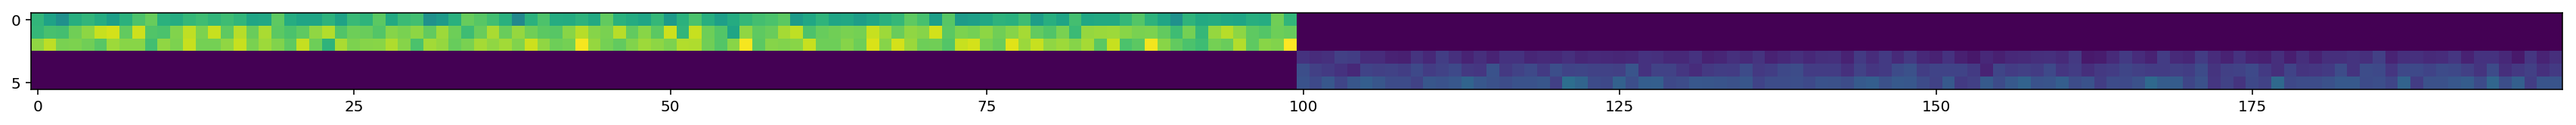

In [85]:
fig = plt.figure(figsize=(30,60))
im = plt.imshow(D)

In [86]:
np.mean(D, axis = 1)

array([50.28 , 63.005, 65.2  ,  9.92 , 14.785, 19.795])

# B) Covariance Mat


In [87]:
# shift data by deducting avg of row
D_prime = (D.transpose() - np.mean(D, axis = 1)).transpose()

In [88]:
D_prime # mean shifted 

array([[ 53.72 ,  40.72 ,  28.72 , ..., -50.28 , -50.28 , -50.28 ],
       [ 41.995,  48.995,  47.995, ..., -63.005, -63.005, -63.005],
       [ 66.8  ,  76.8  ,  60.8  , ..., -65.2  , -65.2  , -65.2  ],
       [ -9.92 ,  -9.92 ,  -9.92 , ...,  15.08 ,   6.08 ,  11.08 ],
       [-14.785, -14.785, -14.785, ...,  15.215,   7.215,  12.215],
       [-19.795, -19.795, -19.795, ...,   9.205,  21.205,  21.205]])

In [89]:
cov_D_prime = 1 /  D_prime.shape[1] * np.dot(D_prime , D_prime.transpose() )

In [90]:
cov_D_prime.shape # should return n by n (gene dim by gene dim)

(6, 6)

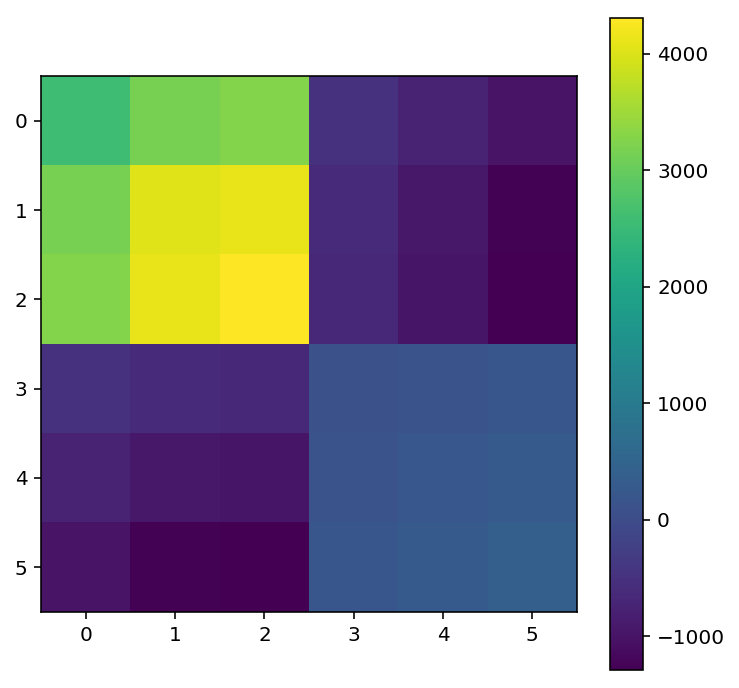

In [91]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(cov_D_prime)
plt.colorbar()

In [70]:
from numpy import linalg as LA

# C) Eigenvector and Eigen values

In [92]:
eig_val_arr, eig_vec_arr = LA.eig(cov_D_prime)

Text(0.5,1,'Eigen vectors')

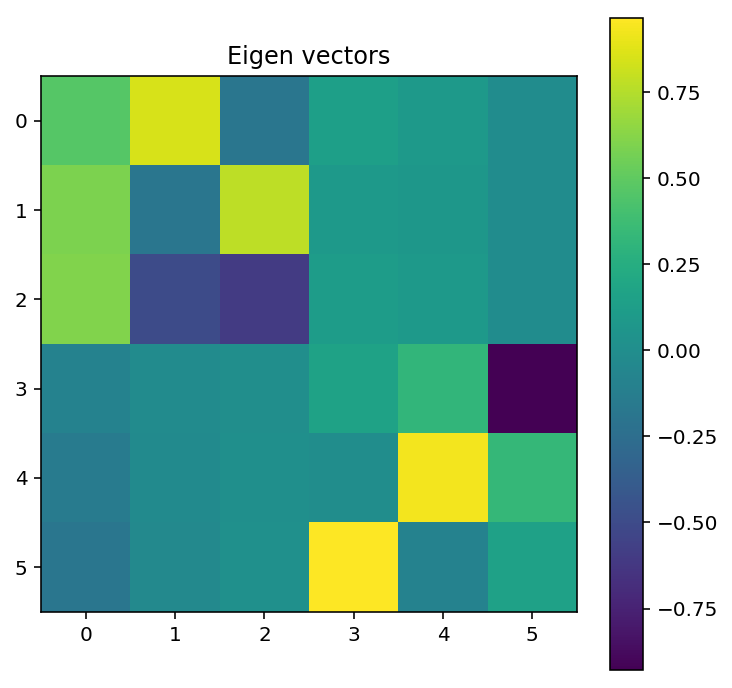

In [93]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(eig_vec_arr)
plt.colorbar()
plt.title('Eigen vectors')

Text(0.5,1,'Eigen value')

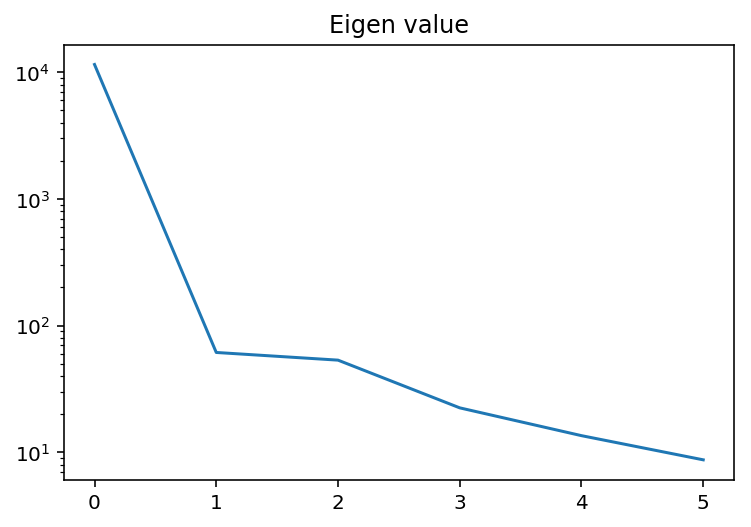

In [94]:
fig = plt.figure() # plot eigen value
plt.semilogy(eig_val_arr)
plt.title('Eigen value')

Comment of Eigenvectors and Eigenvalues: The eigen vectors, or PCs of this covariance matrix,
captures the variance of the data in very low dimension of PC, 
we can see that the PC1's eigen value is >> then the rest, 
showing that PC 1 alone can capture most of the variance.

When we observe the the eignen vectors, we can see that PC1/eigenvetor 1 is 
high in the first three basis, ie (a,b,c, ~0, ~0, ~0) where a,b,c is larger than 0
showing that the PC1 is actually pointing at the direction of the long axis of 
the expression of the growth phase gene

# D) Project onto first two axis

In [95]:
PC1 = eig_vec_arr[:, 0]
PC2 = eig_vec_arr[:, 1]

In [96]:
PC1.shape

(6,)

In [97]:
PC_mat = np.stack((PC1, PC2))

In [98]:
PC_mat.shape

(2, 6)

In [99]:
PC_mat

array([[ 0.46914046,  0.58912057,  0.60939465, -0.092362  , -0.13762882,
        -0.18441776],
       [ 0.84728604, -0.18236177, -0.49631628, -0.01737386, -0.02424471,
        -0.04038627]])

In [100]:
D_prime.shape

(6, 200)

In [101]:
projection_scatter_mat = np.dot(PC_mat, D_prime)

In [102]:
D_prime[:,0]

array([ 53.72 ,  41.995,  66.8  ,  -9.92 , -14.785, -19.795])

In [103]:
np.dot(PC_mat[0, :], D_prime[:,0])

97.25152920981962

In [104]:
np.dot(PC_mat[0, :], D_prime[:,150])

-105.34333521521899

In [105]:
projection_scatter_mat.shape # should now be two dim data points

(2, 200)

Text(0.5,1,'Projection on first two PC')

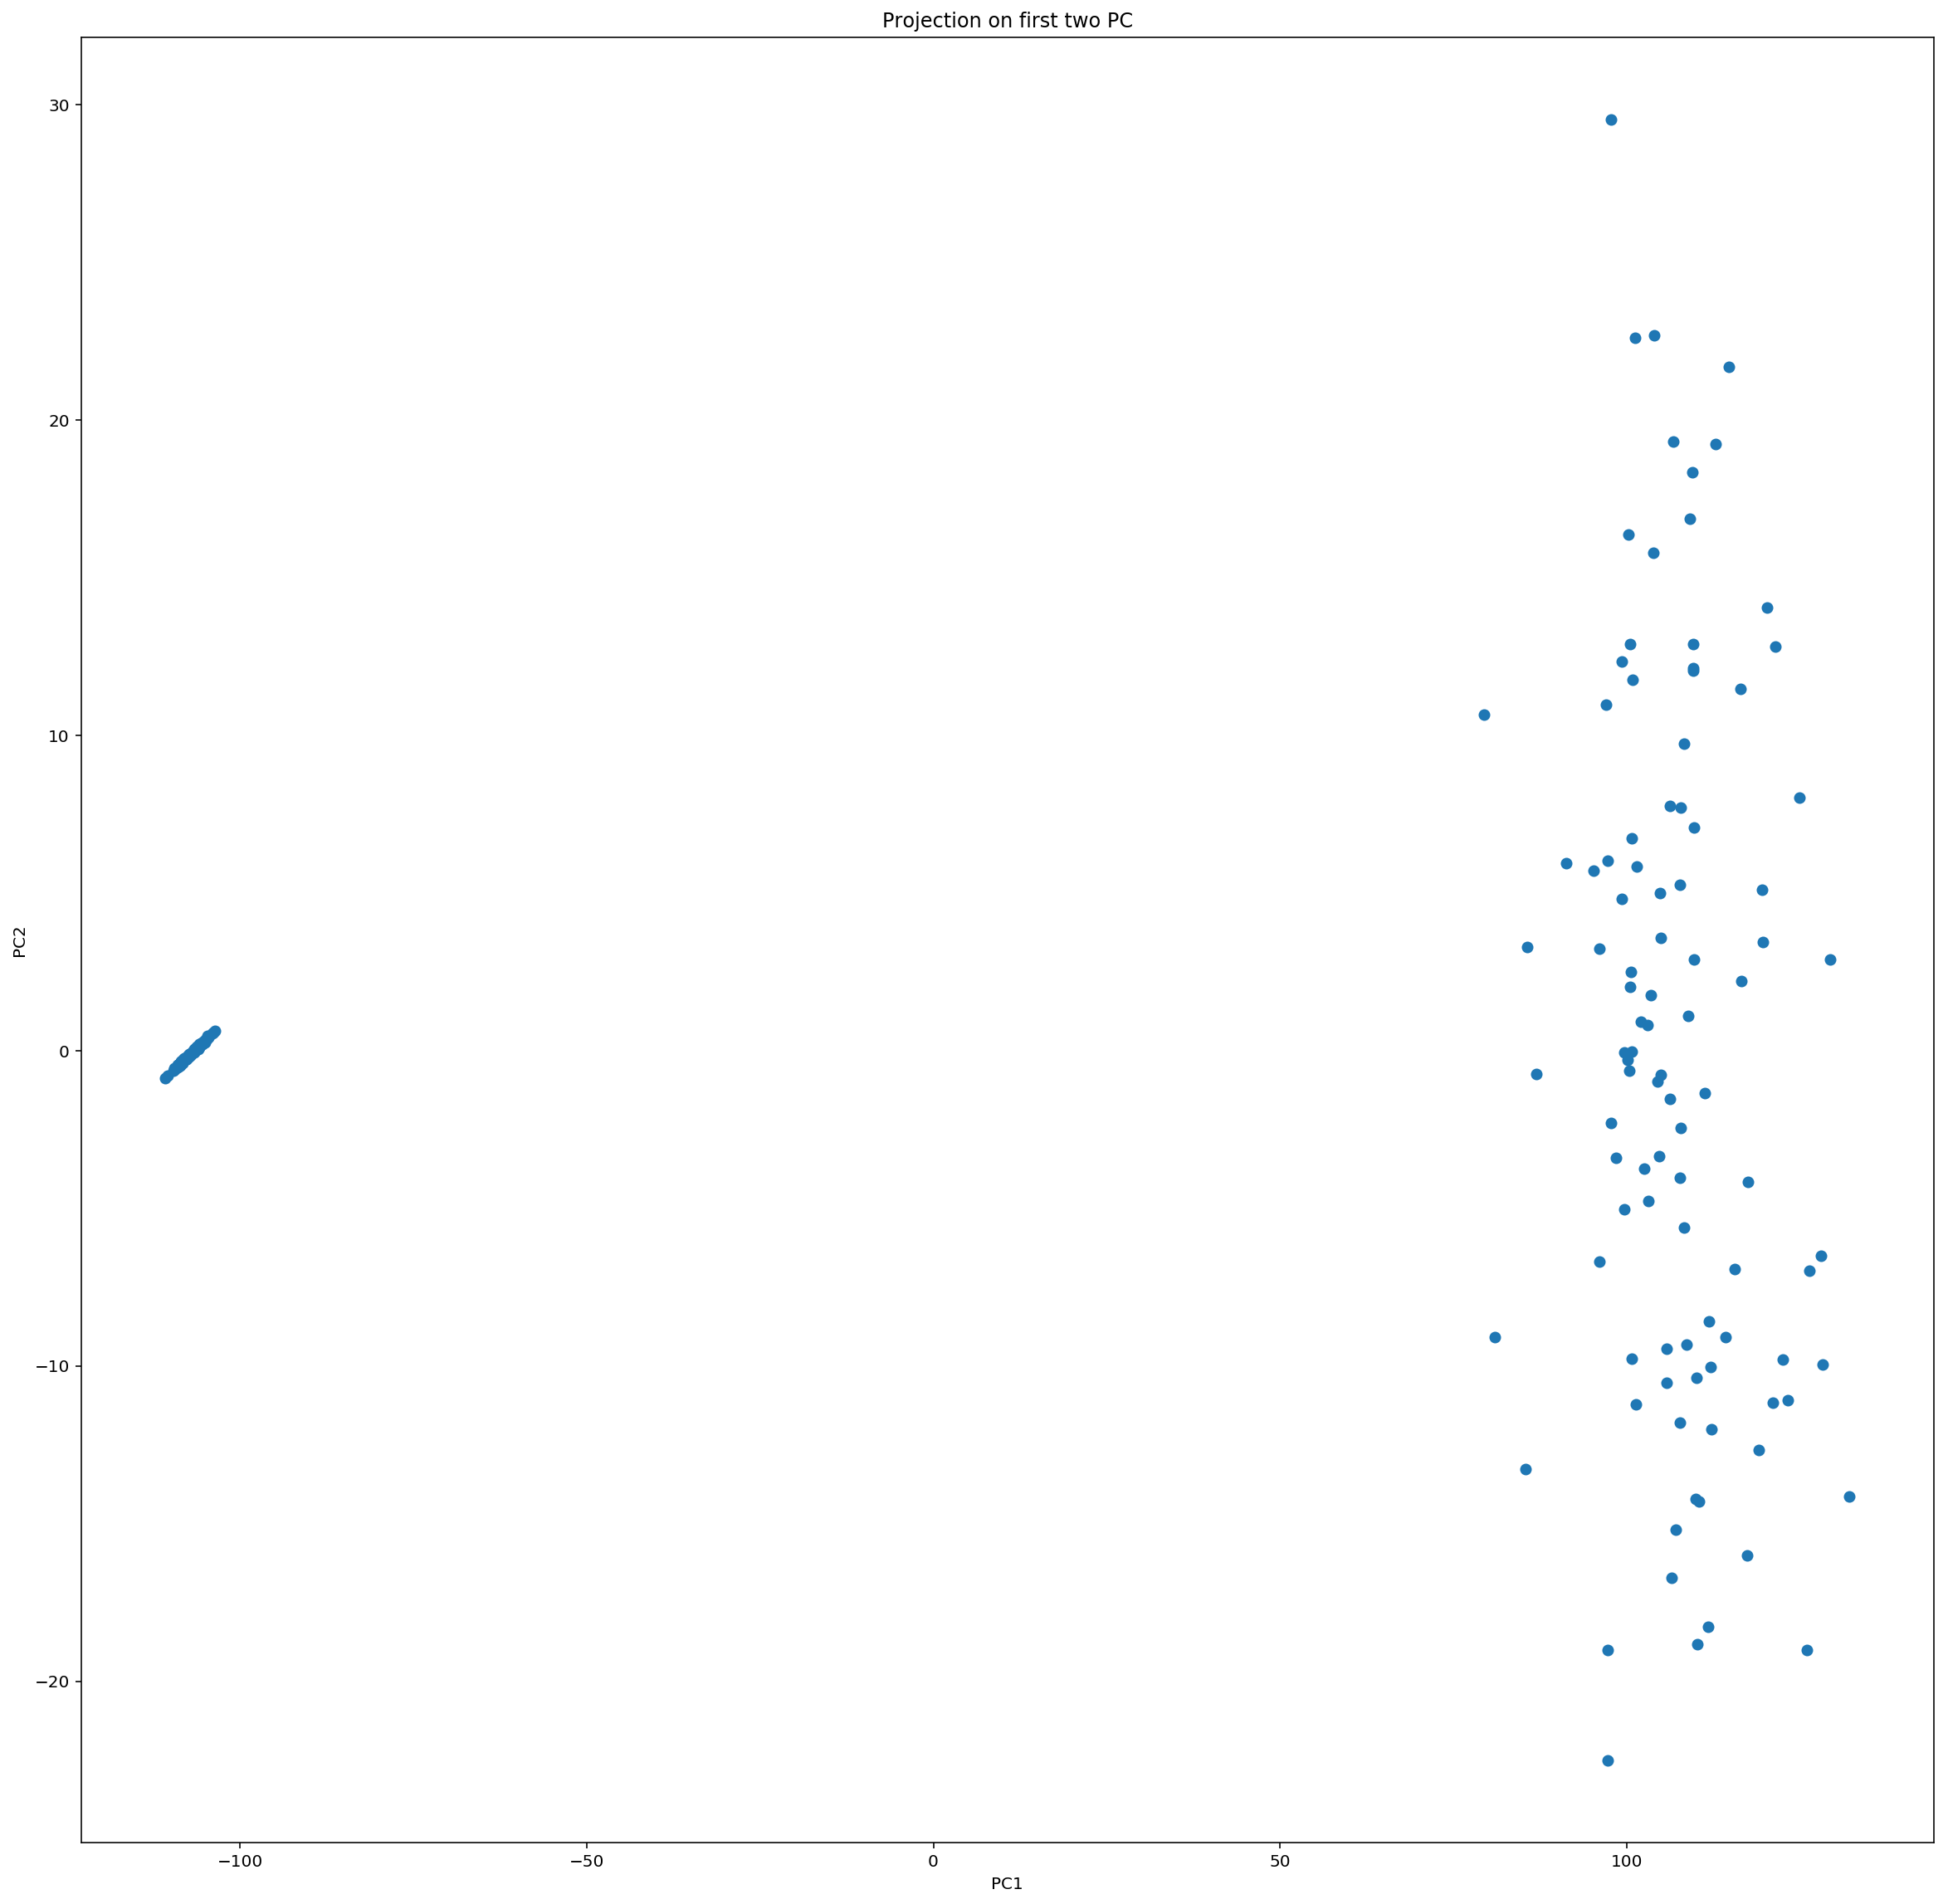

In [106]:
plt.figure(figsize=(20,20))
plt.scatter(projection_scatter_mat[0,:], projection_scatter_mat[1,:])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on first two PC')

# Problem 2 Gene expression for non orthogonal cell

## A) Generate Synthetic and Growth data, plot Cov Mat, and Raw Data heat map


In [23]:
D2 = np.zeros((8, 200))

In [33]:
# growth phase gene expression with poisson distribution
rv_nonO_mu_g1 = poisson(60)
rv_nonO_mu_g3 = poisson(80)
rv_nonO_mu_g4 = poisson(10)
rv_nonO_mu_g5 = poisson(50)
rv_nonO_mu_g6 = poisson(50)


In [34]:
D2[0,0:100] = rv_nonO_mu_g1.rvs(size= 100) # G1
D2[2,0:100] = rv_nonO_mu_g3.rvs(size= 100) #growth 3
D2[3,0:100] = rv_nonO_mu_g4.rvs(size= 100) #growth 4
D2[4,0:100] = rv_nonO_mu_g5.rvs(size= 100) #growth 5
D2[5,0:100] = rv_nonO_mu_g6.rvs(size= 100) #growth 6

In [35]:
# starve phase gene w/ poisson dist

rv_nonO_mu_s2 = poisson(30)
rv_nonO_mu_s3 = poisson(10)
rv_nonO_mu_s5 = poisson(30)
rv_nonO_mu_s6 = poisson(50)
rv_nonO_mu_s7 = poisson(50)
rv_nonO_mu_s8 = poisson(10)

In [36]:
D2[1,100:200] = rv_nonO_mu_s2.rvs(size= 100) # 
D2[2,100:200] = rv_nonO_mu_s3.rvs(size= 100) # 
D2[4,100:200] = rv_nonO_mu_s5.rvs(size= 100) #

D2[5,100:200] = rv_nonO_mu_s6.rvs(size= 100) # 
D2[6,100:200] = rv_nonO_mu_s7.rvs(size= 100) # 
D2[7,100:200] = rv_nonO_mu_s8.rvs(size= 100) #


Text(0.5,1,'Raw data heat map: gene by cell')

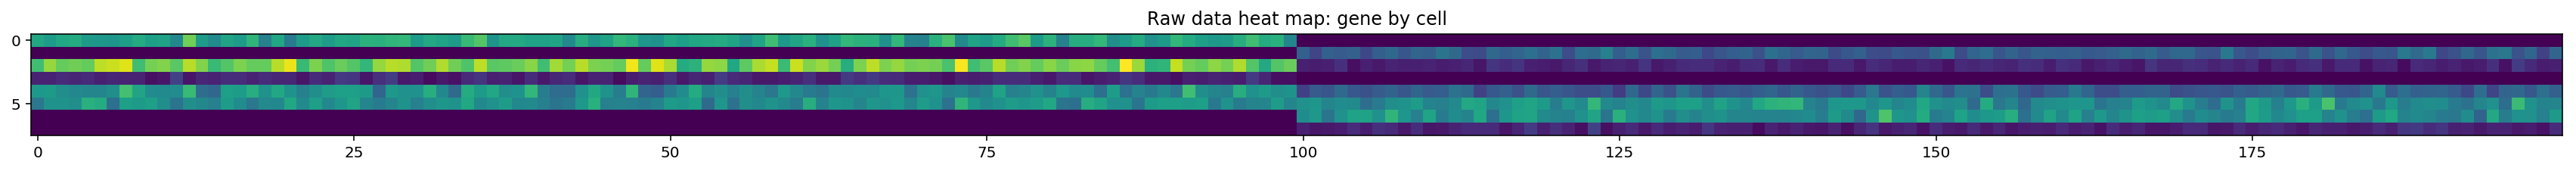

In [38]:
plt.figure(figsize=(30,30))
plt.imshow(D2)
plt.title('Raw data heat map: gene by cell')

In [39]:
# Mean shift and Covariance matrix

In [40]:
# shift data by deducting avg of row
D2_prime = (D2.transpose() - np.mean(D2, axis = 1)).transpose()

In [41]:
D2_prime

array([[ 30.555,  26.555,  30.555, ..., -29.445, -29.445, -29.445],
       [-15.31 , -15.31 , -15.31 , ...,  17.69 ,   4.69 ,  17.69 ],
       [ 24.8  ,  39.8  ,  31.8  , ..., -33.2  , -37.2  , -36.2  ],
       ...,
       [-10.27 ,   1.73 ,   1.73 , ...,   1.73 ,  -5.27 ,  -4.27 ],
       [-24.995, -24.995, -24.995, ...,  26.005,  19.005,  30.005],
       [ -4.765,  -4.765,  -4.765, ...,   3.235,   0.235,   8.235]])

In [54]:
D2_prime.transpose()

array([[ 30.555, -15.31 ,  24.8  , ..., -10.27 , -24.995,  -4.765],
       [ 26.555, -15.31 ,  39.8  , ...,   1.73 , -24.995,  -4.765],
       [ 30.555, -15.31 ,  31.8  , ...,   1.73 , -24.995,  -4.765],
       ...,
       [-29.445,  17.69 , -33.2  , ...,   1.73 ,  26.005,   3.235],
       [-29.445,   4.69 , -37.2  , ...,  -5.27 ,  19.005,   0.235],
       [-29.445,  17.69 , -36.2  , ...,  -4.27 ,  30.005,   8.235]])

In [43]:
cov_D2_prime = (1 /  (D2_prime.shape[1] - 1 )) * np.dot(D2_prime , D2_prime.transpose() ) # cov Mat construction

In [53]:
cov_D2_prime

array([[ 8.96529623e+02, -4.53068291e+02,  1.04100101e+03,
         1.48744824e+02,  2.94341256e+02, -4.59814070e+00,
        -7.39676156e+02, -1.41010477e+02],
       [-4.53068291e+02,  2.48647136e+02, -5.41147739e+02,
        -7.72424121e+01, -1.51403116e+02,  1.41336683e+00,
         3.81855829e+02,  7.46109045e+01],
       [ 1.04100101e+03, -5.41147739e+02,  1.28230151e+03,
         1.78297487e+02,  3.44515578e+02, -3.07437186e+00,
        -8.80848241e+02, -1.69098492e+02],
       [ 1.48744824e+02, -7.72424121e+01,  1.78297487e+02,
         3.18287437e+01,  5.02148744e+01, -1.94512563e+00,
        -1.26105427e+02, -2.40405025e+01],
       [ 2.94341256e+02, -1.51403116e+02,  3.44515578e+02,
         5.02148744e+01,  1.46667236e+02,  2.76010050e+00,
        -2.45206985e+02, -4.57383417e+01],
       [-4.59814070e+00,  1.41336683e+00, -3.07437186e+00,
        -1.94512563e+00,  2.76010050e+00,  5.34242211e+01,
         8.97120603e+00,  9.07989950e-01],
       [-7.39676156e+02,  3.818558

Text(0.5,1,' heat map: Covariance Mat of the non-ortho cells')

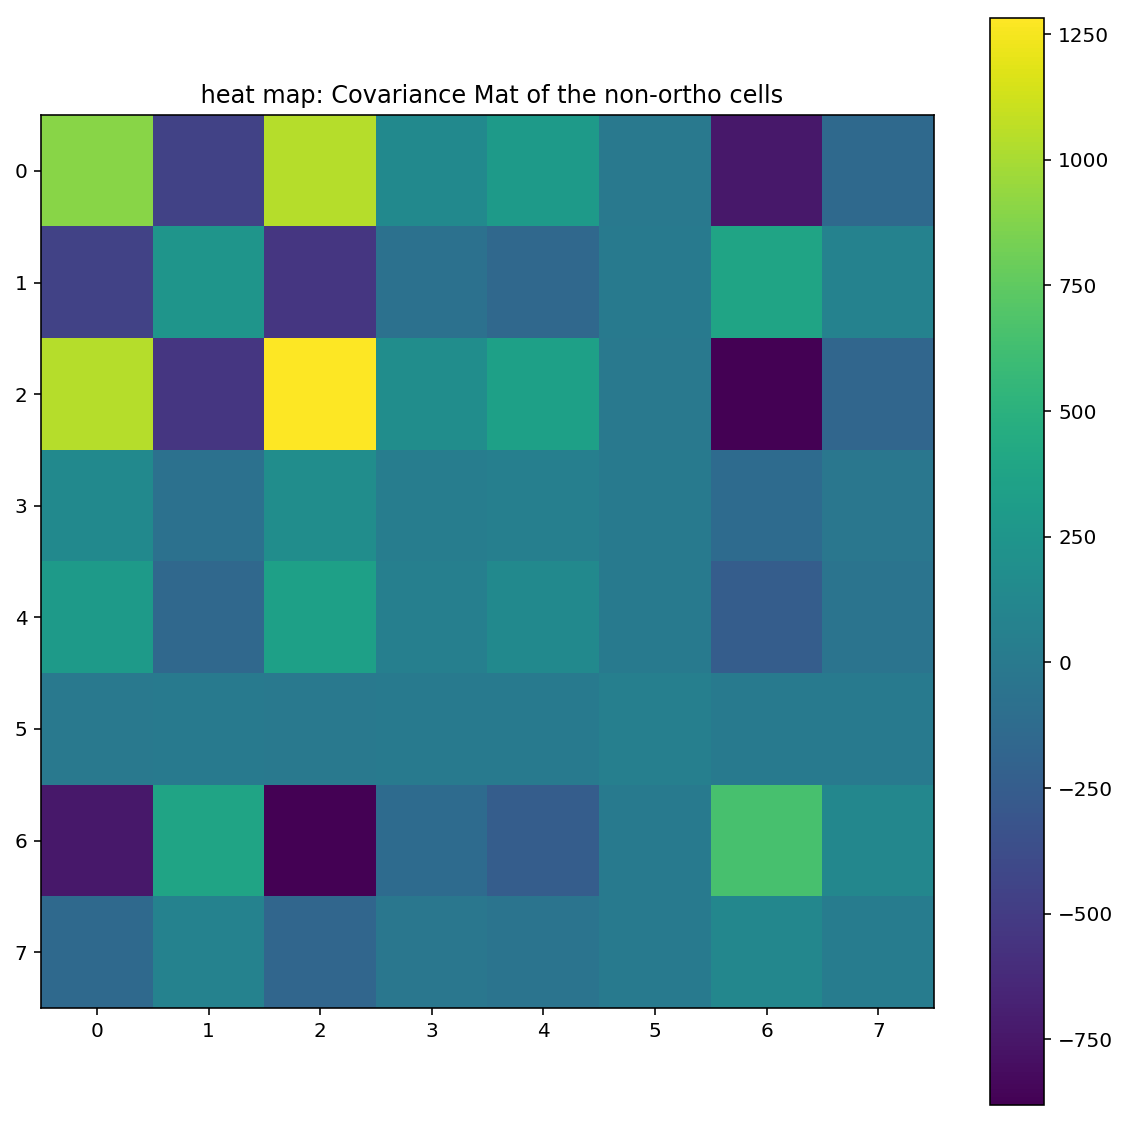

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(cov_D2_prime)
plt.colorbar()
plt.title(' heat map: Covariance Mat of the non-ortho cells')

#### Gene 6 (Index 5) has very little variance. Both state has the same mean. Since PCA can result in both Pos and Neg value,
#### the actual interpretation of the axis could be tricky. Although for this case, the PC1 seems to be capturing the large variance
#### in Gene 1 , 3 and 7 (index 0, 2, 6)

## B) Calculate Eigens, plot, comment

In [47]:
eig_val_arr2, eig_vec_arr2 = LA.eig(cov_D2_prime)

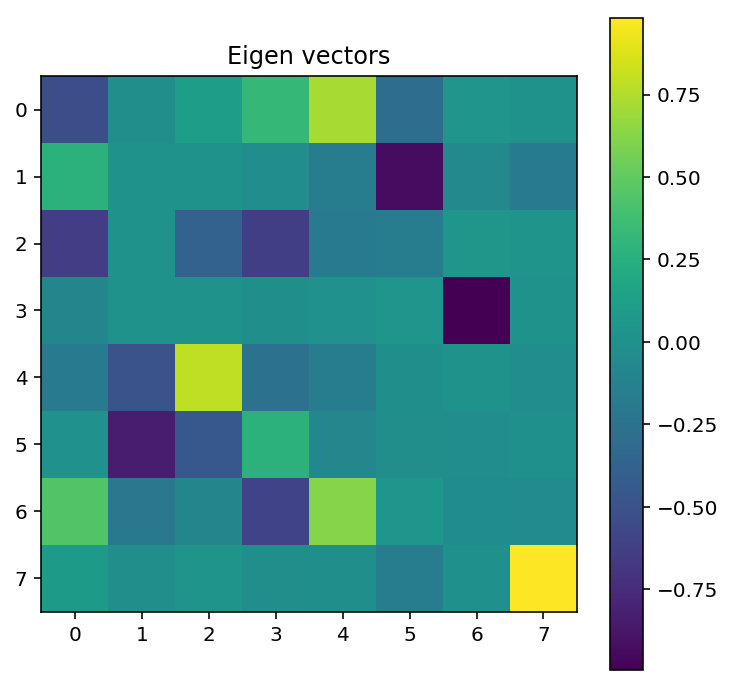

In [51]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(eig_vec_arr2)
plt.title('Eigen vectors')
plt.colorbar()

Text(0.5,1,'Eigen Val')

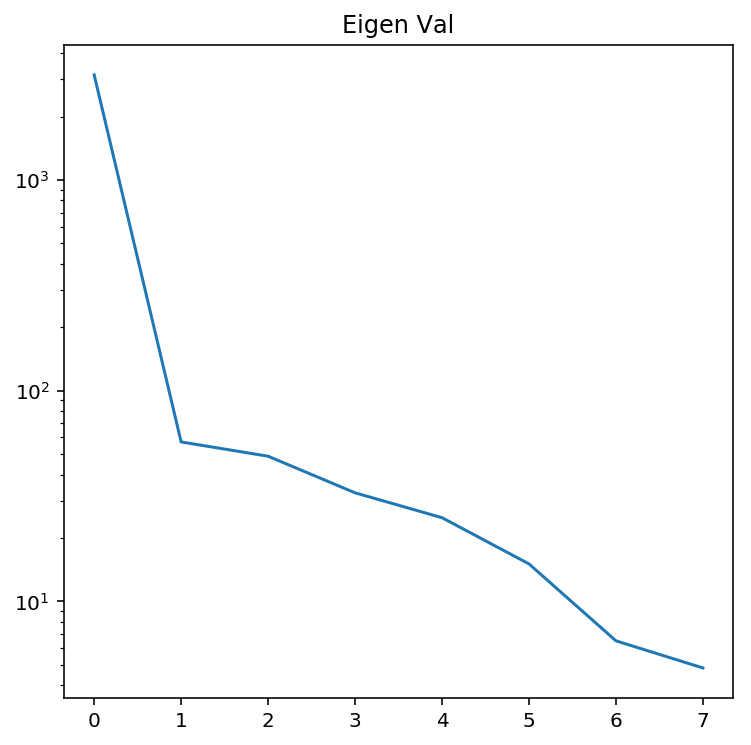

In [50]:
fig = plt.figure(figsize=(6,6))
im = plt.semilogy(eig_val_arr2)
plt.title('Eigen Val')

## C) Implement nnmf using update rule. Try innter dim k = 1,2,3 plot heat map of H & W and comment

In [107]:
# Implement the update rule

In [114]:
np.random.seed(10)  # set the seed so that

In [115]:
np.random.uniform(0,10,10)

array([7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012,
       2.24796646, 1.98062865, 7.60530712, 1.69110837, 0.88339814])

In [116]:
np.random.uniform(0,10,10)

array([6.85359818, 9.53393346, 0.03948266, 5.12192263, 8.12620962,
       6.12526067, 7.21755317, 2.91876068, 9.17774123, 7.14575783])

In [117]:
def W_H_init(k, n , m):
    '''
    randomly generate W and H matrix given the dimension n, m  and 
    PC num k, all intger.
    Return W (n by k)and H matrix (k by m)
    '''
    W = np.random.uniform(0.01, 50, n*k).reshape((n, k))
    H = np.random.uniform(0.01, 50, k*m).reshape((k, m))
    
    return W, H

In [131]:
# test init working
k = 2
n = 8 # 8 genes
m = 200 # should  be 200 in real test


In [132]:
W1, H1 = W_H_init(k, n , m)

In [142]:
W1.shape

(8, 2)

In [136]:
H1.shape

(2, 200)

In [124]:
# test element wise division and multiplication
test_A = np.array([[1,2,3], [4,5,6]])
test_B = np.array([[6,6,6], [6,6,6]])
test_C = np.array([[2,4,6], [1,3,5]])
#np.true_divide

In [123]:
np.true_divide(test_A, test_B)

array([[0.16666667, 0.33333333, 0.5       ],
       [0.66666667, 0.83333333, 1.        ]])

In [126]:
test_A

array([[1, 2, 3],
       [4, 5, 6]])

In [127]:
test_C

array([[2, 4, 6],
       [1, 3, 5]])

In [125]:
np.multiply(test_A,test_C)

array([[ 2,  8, 18],
       [ 4, 15, 30]])

In [327]:
np.subtract(test_A,test_C)

array([[-1, -2, -3],
       [ 3,  2,  1]])

In [133]:
def updateH(D, W, H):
    '''
    Function that updates entries of H_ij
    given D (n by m), W (n by k), H (k by m)
    '''
    
    tmp_numerator = np.dot(W.transpose(), D) # W' * D
    tmp_denominator = np.dot(np.dot(W.transpose(), W ) , H) # W' * W * H
    
    H_next = np.multiply(H, np.true_divide(tmp_numerator, tmp_denominator)) # elementwise mult of the element division
    
    return H_next

In [134]:
# test case
H_2 = updateH(D = D2, W = W1, H = H1 )

In [139]:
def updateW(D, W, H):
    '''
    Function that updates entries of W_ij using D and H
    
    '''
    
    tmp_numerator =  np.dot(D, H.transpose()) # D * H'
    tmp_denominator = np.dot(np.dot(W , H), H.transpose()) # W * H * H'
    
    W_next = np.multiply(W, np.true_divide(tmp_numerator,  tmp_denominator))# elementwise mult of the element division
    
    return W_next

In [140]:
H_2.shape

(2, 200)

In [141]:
W2 = updateW(D = D2, W = W1, H = H1)

In [143]:
W2.shape

(8, 2)

In [144]:
W2

array([[0.38364324, 0.63436714],
       [0.27701611, 0.25620198],
       [0.78420894, 0.78595667],
       [0.00301772, 0.15829117],
       [0.59544169, 0.77822821],
       [0.71251765, 1.0161247 ],
       [0.41701542, 0.43462708],
       [0.04653471, 0.10627833]])

In [147]:
# test k = 1 
k = 1
n = 8 # 8 genes
m = 200 # sample num

In [148]:
W_k1, H_k1 = W_H_init(k, n , m)

In [149]:
W_k1.shape

(8, 1)

In [154]:
#W_k1

array([[32.42082125],
       [ 3.26080989],
       [12.01724432],
       [ 4.53142645],
       [38.05063426],
       [10.77419548],
       [34.02869088],
       [23.74862279]])

In [150]:
#H_k1.shape

(1, 200)

In [157]:
def update_multi_WH(iteration_no, W, H, D):
    
    '''
    Use the Lee, Seung Algorthm to iteratively update W and H no # of times using the data D
    '''
    
    W_prev = W
    H_prev = H
    
    for i in range(100):
    
        H_next = updateH(D = D, W = W_prev, H = H_prev) # update using previous H and W
    
        W_next = updateW(D = D, W = W_prev, H = H_prev) # update using previous H and W
    
        # dynamically swap H W prev --> H W next
    
        H_prev = H_next
        W_prev = W_next
        
        
    return W_prev, H_prev    

In [152]:
#W_prev = W_k1
#H_prev = H_k1

# update

#for i in range(100):
    
#    H_next = updateH(D = D2, W = W_prev, H = H_prev) # update using previous H and W
    
#    W_next = updateW(D = D2, W = W_prev, H = H_prev) # update using previous H and W
#    
#    # dynamically swap H W prev --> H W next
#    
#    H_prev = H_next
#    W_prev = W_next

In [160]:
W_k1_updated, H_k1_updated = update_multi_WH(iteration_no = 1000, W = W_k1, H = H_k1, D = D2)


In [161]:
W_k1_updated

array([[36.02208235],
       [ 8.82929069],
       [52.12624873],
       [ 6.1279308 ],
       [39.14845568],
       [45.4043065 ],
       [14.50068342],
       [ 2.75297685]])

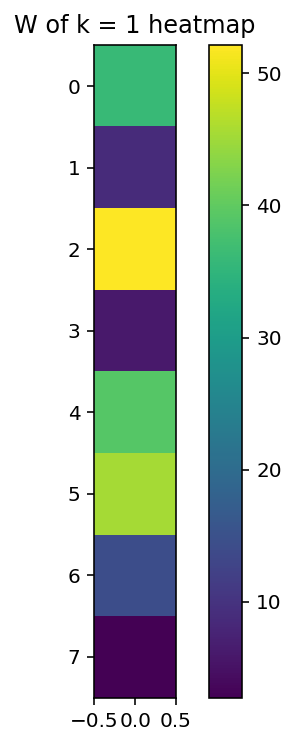

In [162]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(W_k1_updated)
plt.title('W of k = 1 heatmap')
plt.colorbar()

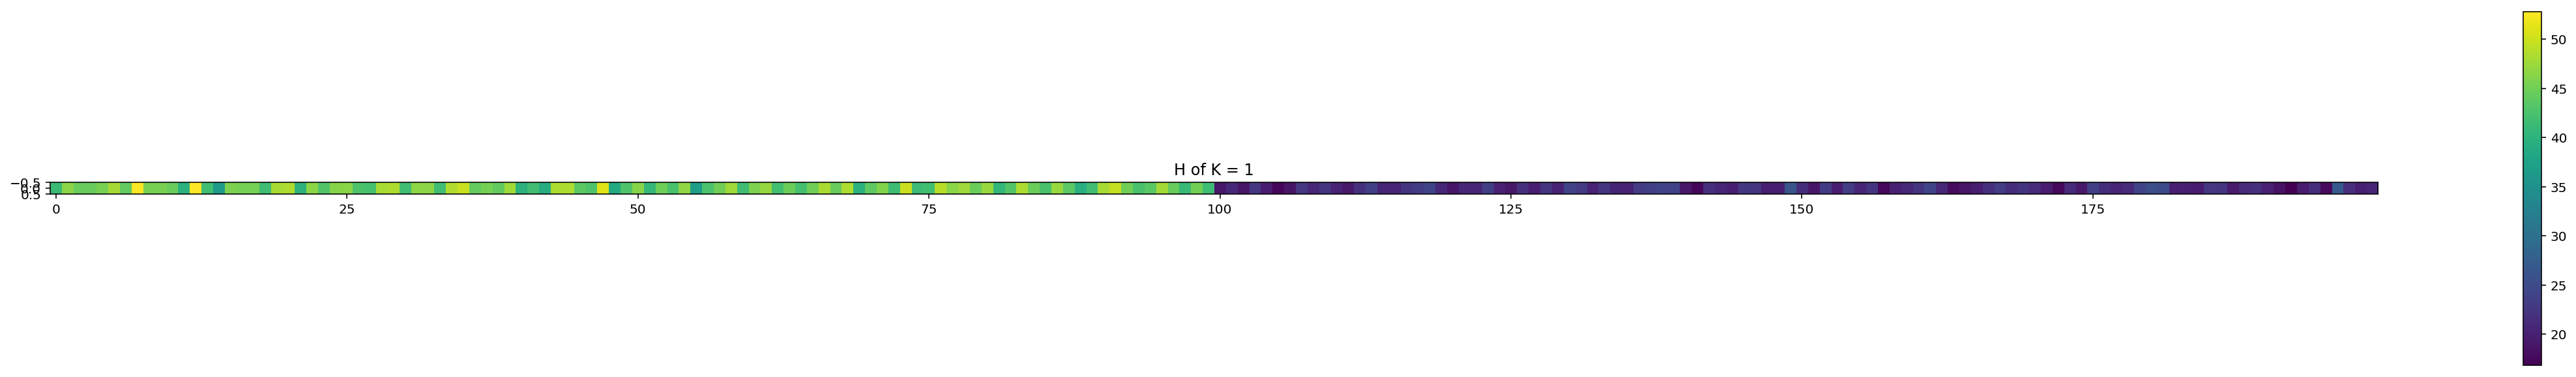

In [167]:
fig = plt.figure(figsize=(40,5))
im = plt.imshow(H_k1_updated)
plt.title('H of K = 1')
plt.colorbar()

### Comment on k =1 : Fits the expression profile of growth phase cells (first 100) well with high expression 
### in the H matrix. But does not fit the starve cell (last 100) as the expression is just low

In [ ]:
## K = 2

In [168]:
k = 2
W_k2, H_k2 = W_H_init(k, n , m)
W_k2_updated, H_k2_updated = update_multi_WH(iteration_no = 1000, W = W_k2, H = H_k2, D = D2)

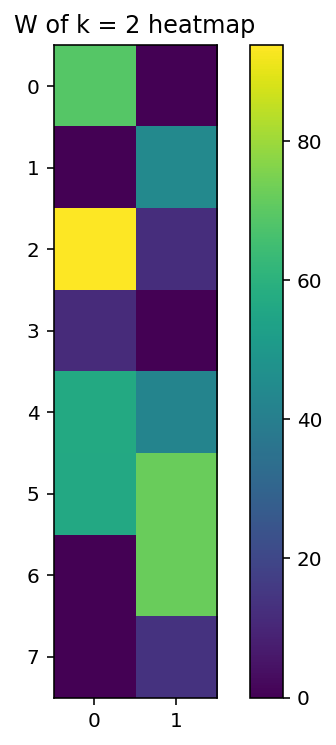

In [169]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(W_k2_updated)
plt.title('W of k = 2 heatmap')
plt.colorbar()

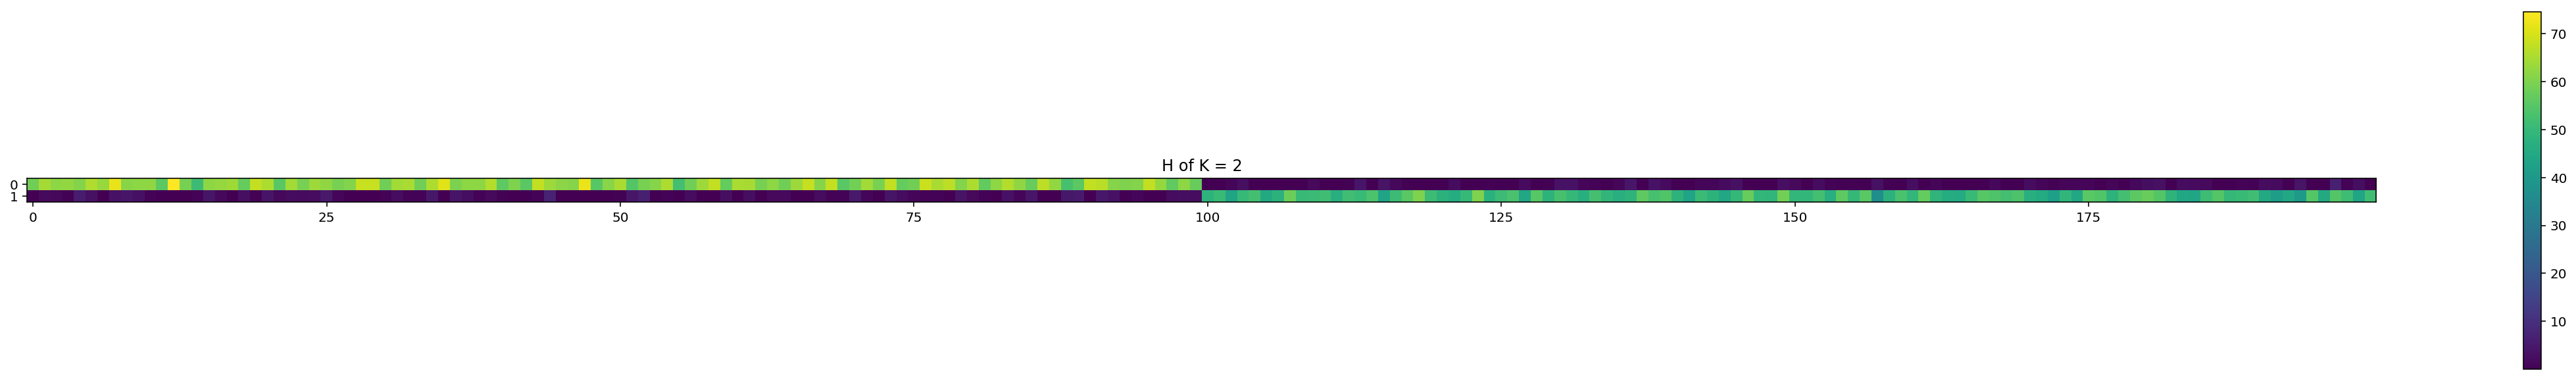

In [170]:
fig = plt.figure(figsize=(40,5))
im = plt.imshow(H_k2_updated)
plt.title('H of K = 2')
plt.colorbar()

### Comment on k =2 : w1 Fits the expression profile of growth phase cells (first 100) with high expression 
### in the first row of H matrix. w2 fit the starve cell (last 100) with high expression in with high expression in the
### second row of the H matrix

In [171]:
# k = 3

In [172]:
k = 3
W_k3, H_k3 = W_H_init(k, n , m)
W_k3_updated, H_k3_updated = update_multi_WH(iteration_no = 1000, W = W_k3, H = H_k3, D = D2)

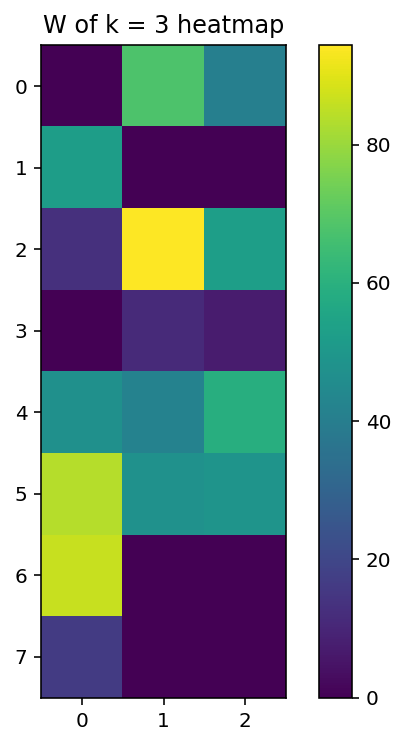

In [173]:
fig = plt.figure(figsize=(6,6))
im = plt.imshow(W_k3_updated)
plt.title('W of k = 3 heatmap')
plt.colorbar()

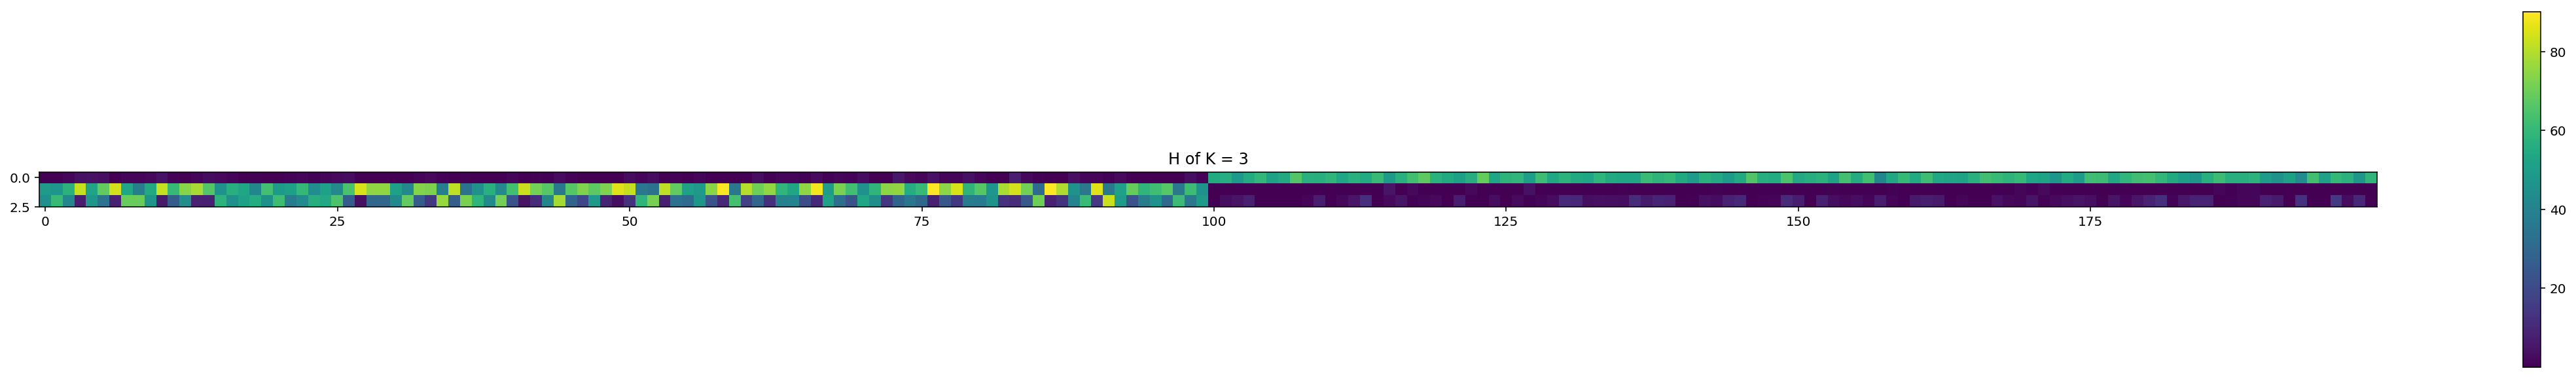

In [174]:
fig = plt.figure(figsize=(40,5))
im = plt.imshow(H_k3_updated)
plt.title('H of K = 3')
plt.colorbar()

### Comment on k =3 : w1 Fits the expression profile of starve phase cells (last 100) with high expression 
### in the 3rd row of H matrix. w2 and 3 jointly reconstruct growth cell (1st 100) with  in with intermingled expression in the
### second , third row of the H matrix

# Problem 3 : PCA and NNMF on PBMC

In [179]:
import pandas as pd

### A: Perform PCA,plot heat maps of CoV Mat, plot first 20 eig value

In [176]:
ls

HW6_problem1.ipynb              pbmc_data_matt.csv
PBMC_6_Gene_Names - Sheet1.csv


In [190]:
pbmc_df = pd.read_csv('pbmc_data_matt.csv', header=None, usecols = list(np.random.choice(7999, 1200)))

In [191]:
pbmc_df.describe() # only sample ~1000 cells

2            12           13           18           19    \
count  1618.000000  1618.000000  1618.000000  1618.000000  1618.000000   
mean      2.776824     2.465336     2.666999     2.648957     2.665223   
std       6.106126     5.929986     5.863703     5.735777     5.846072   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.593075     0.000000     0.020898     0.000000     1.405225   
max      67.855000    51.351000    49.600000    45.015000    81.129000   

              27           33           35           50           59    ...  \
count  1618.000000  1618.000000  1618.000000  1618.000000  1618.000000  ...   
mean      2.539960     2.419174     2.538776     2.473501     2.559584  ...   
std       6.173241     5.974738     6.225170     6.092373     6.172054  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max      86.065000    66.343000    88.141000    88.694000    97.325000  ...   

              7909         7929         7941         7943         7954  \
count  1618.000000  1618.000000  1618.000000  1618.000000  1618.000000   
mean      4.799170     4.076217     5.524951     5.117904     9.767376   
std      19.359292    18.476337    24.081911    23.891725    26.550416   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     242.370000   312.360000   321.600000   324.810000   227.130000   

              7957         7968         7979         7981         7989  
count  1618.000000  1618.000000  1618.000000  1618.000000  1618.000000  
mean      7.151791     9.822562    11.362515     9.569700    12.636008  
std      27.396980    28.790088    31.744565    30.600684    32.115342  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max     314.540000   248.300000   252.170000   307.480000   245.020000  

[8 rows x 1118 columns]

In [192]:
pbmc_arr = pbmc_df.values

In [193]:
pbmc_arr.shape # gene by cell in numpy arr

(1618, 1118)

In [194]:
from sklearn.decomposition import PCA

In [195]:
pca = PCA(n_components= 20)

In [196]:
pca.fit(pbmc_arr.transpose())
pca_pbmc_20_dim = pca.transform(pbmc_arr.transpose())

In [197]:
pca_pbmc_20_dim.shape # sample by dim

(1118, 20)

In [200]:
pca_pbmc_20_dim[:,0]

array([ 81.28789917,  79.03065504,  77.05421423, ..., 670.51044509,
       585.29444698, 801.67283687])

In [209]:
pca.explained_variance_

array([5984.03973064, 5081.76015198, 3567.64854181, 2388.39769247,
       1721.47016001, 1390.80539445, 1133.20984658, 1061.86345894,
        921.3673585 ,  902.58269194,  867.71316364,  829.47928374,
        815.70543718,  742.65660883,  700.57635523,  691.87615387,
        653.42579338,  620.57482358,  597.9805922 ,  590.48032569])

Text(0.5,1,'Eigen Value')

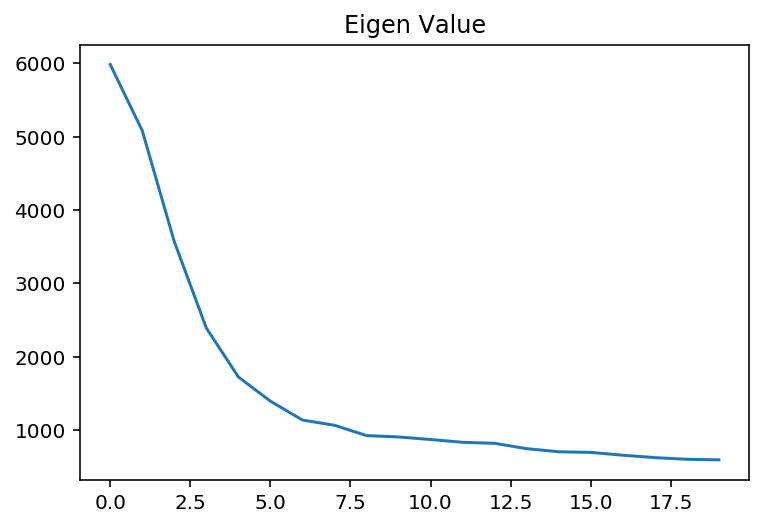

In [210]:
plt.plot(pca.explained_variance_)
plt.title('Eigen Value')

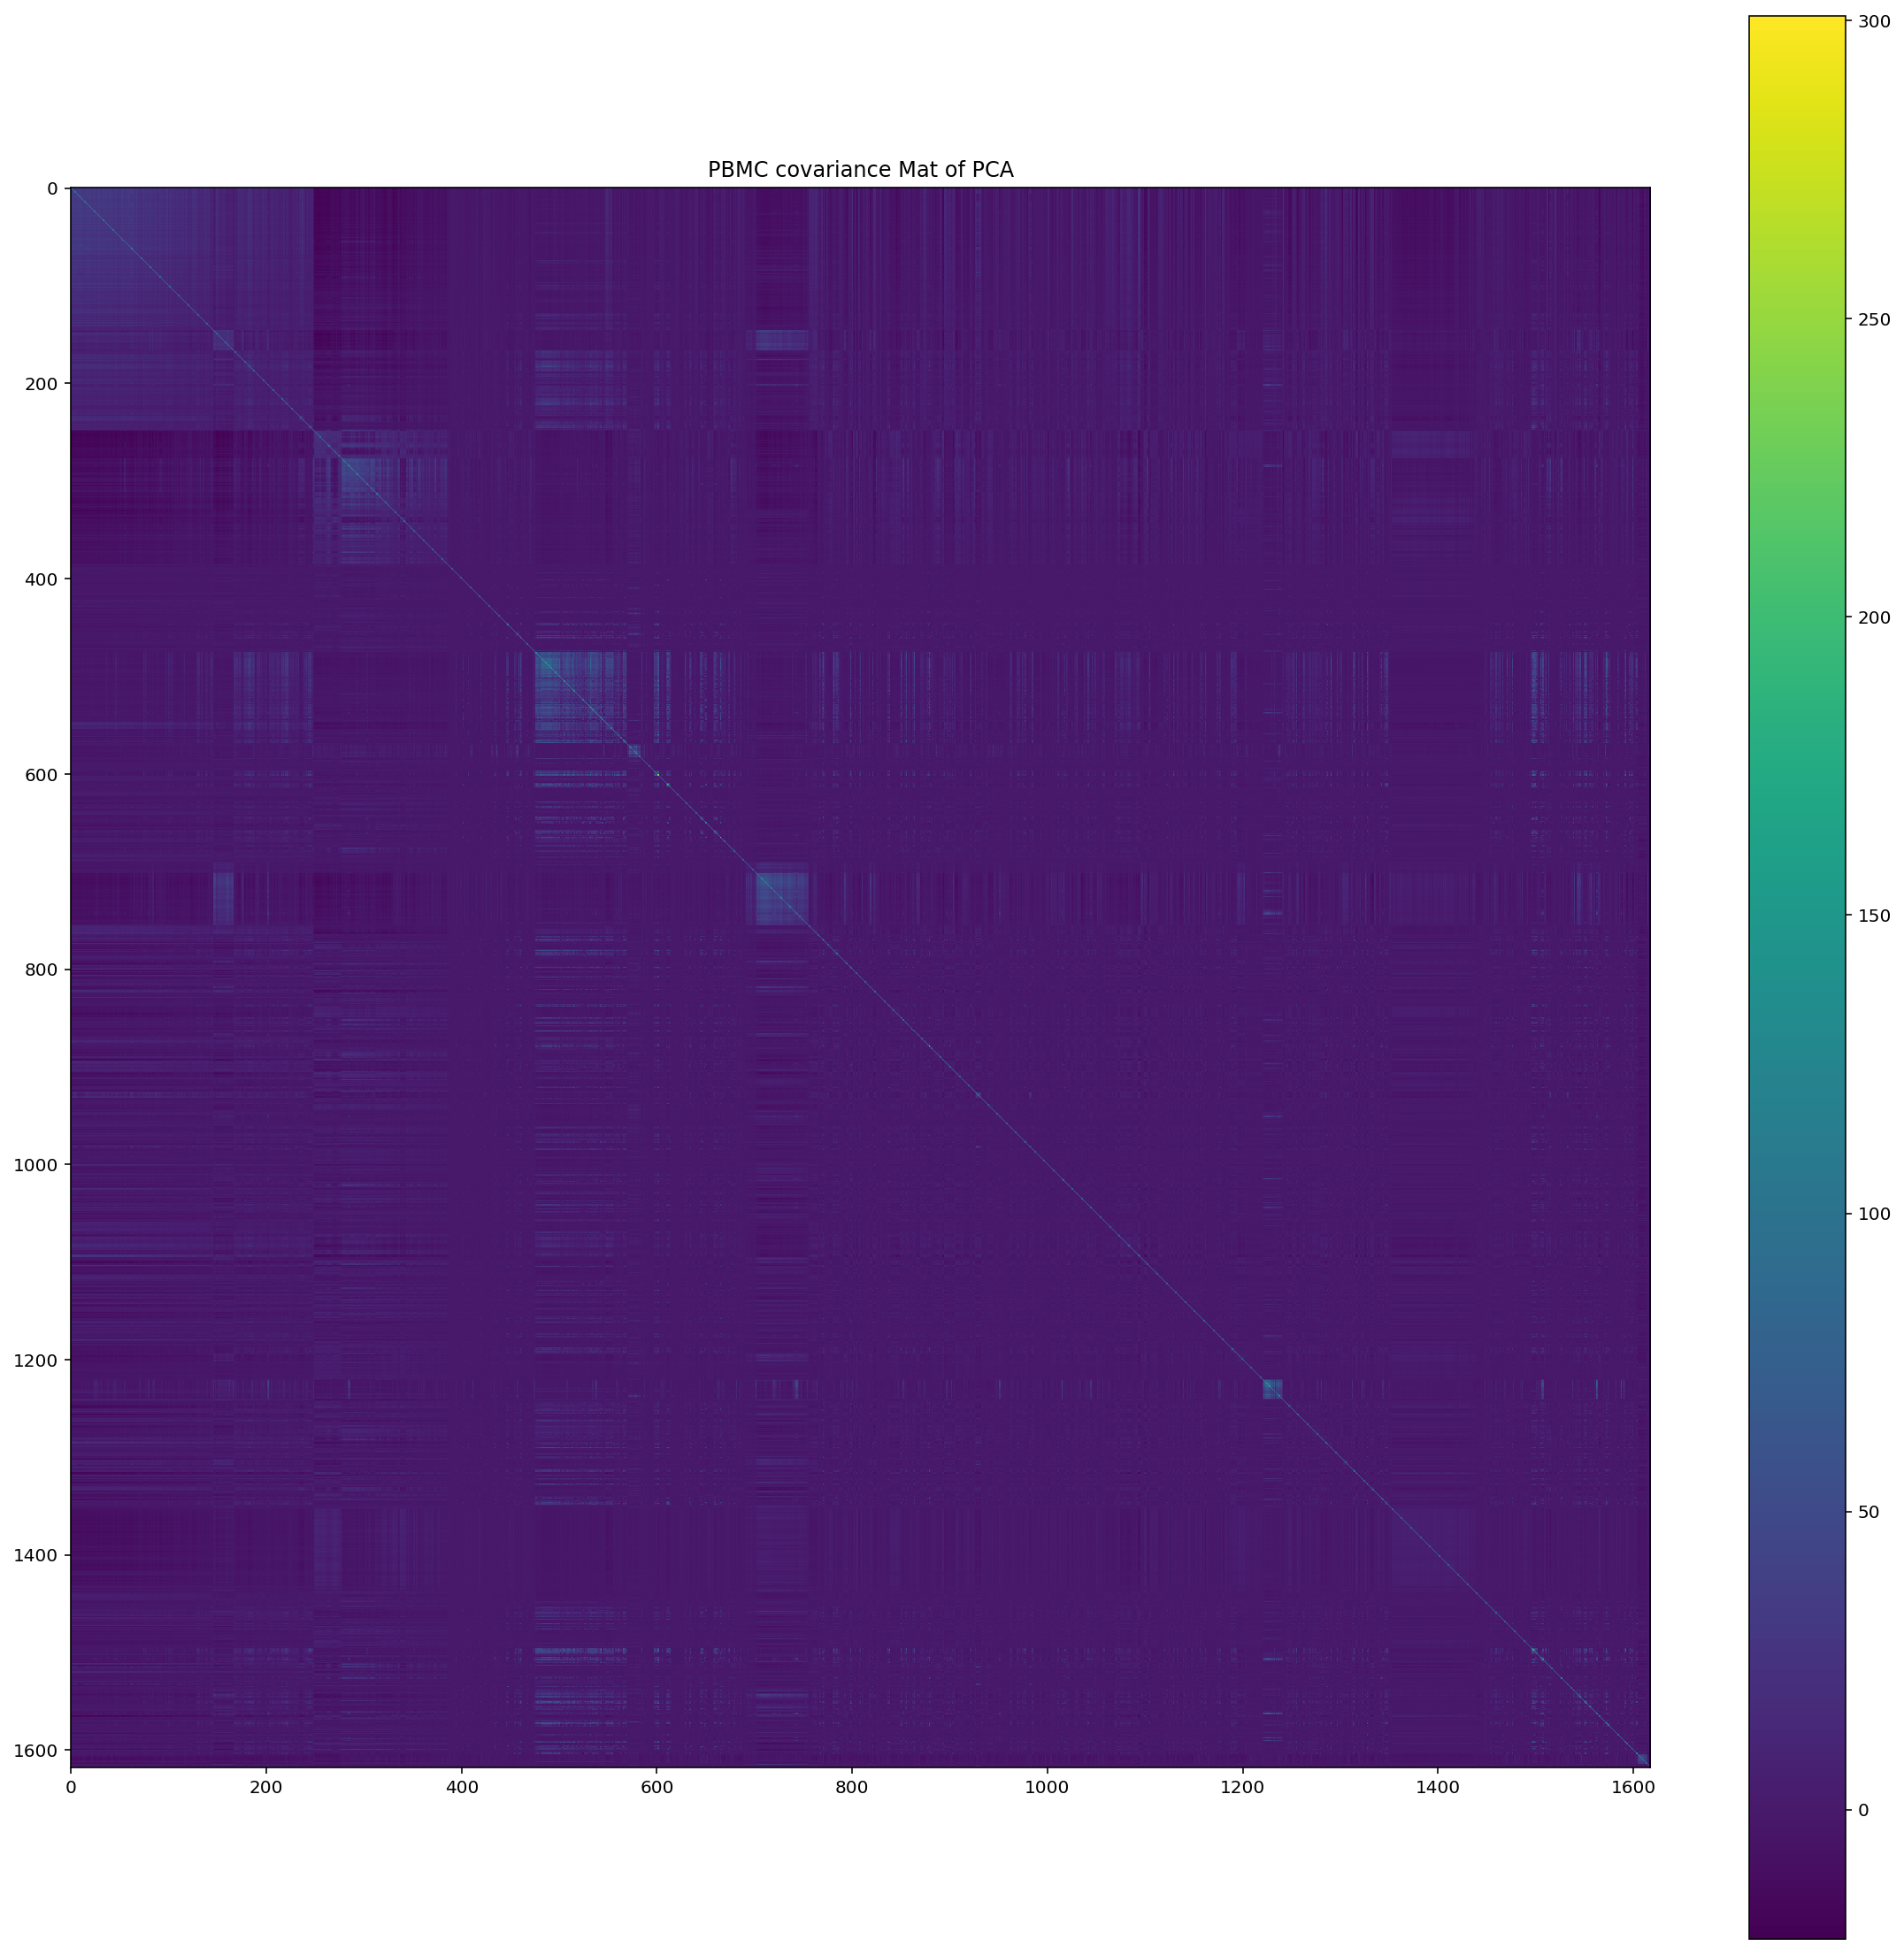

In [211]:
plt.figure(figsize=(20,20))
plt.imshow(pca.get_covariance())
plt.title('PBMC covariance Mat of PCA')
plt.colorbar()

### B: Project data into first two PC, plot scatter plot

Text(0,0.5,'PC2')

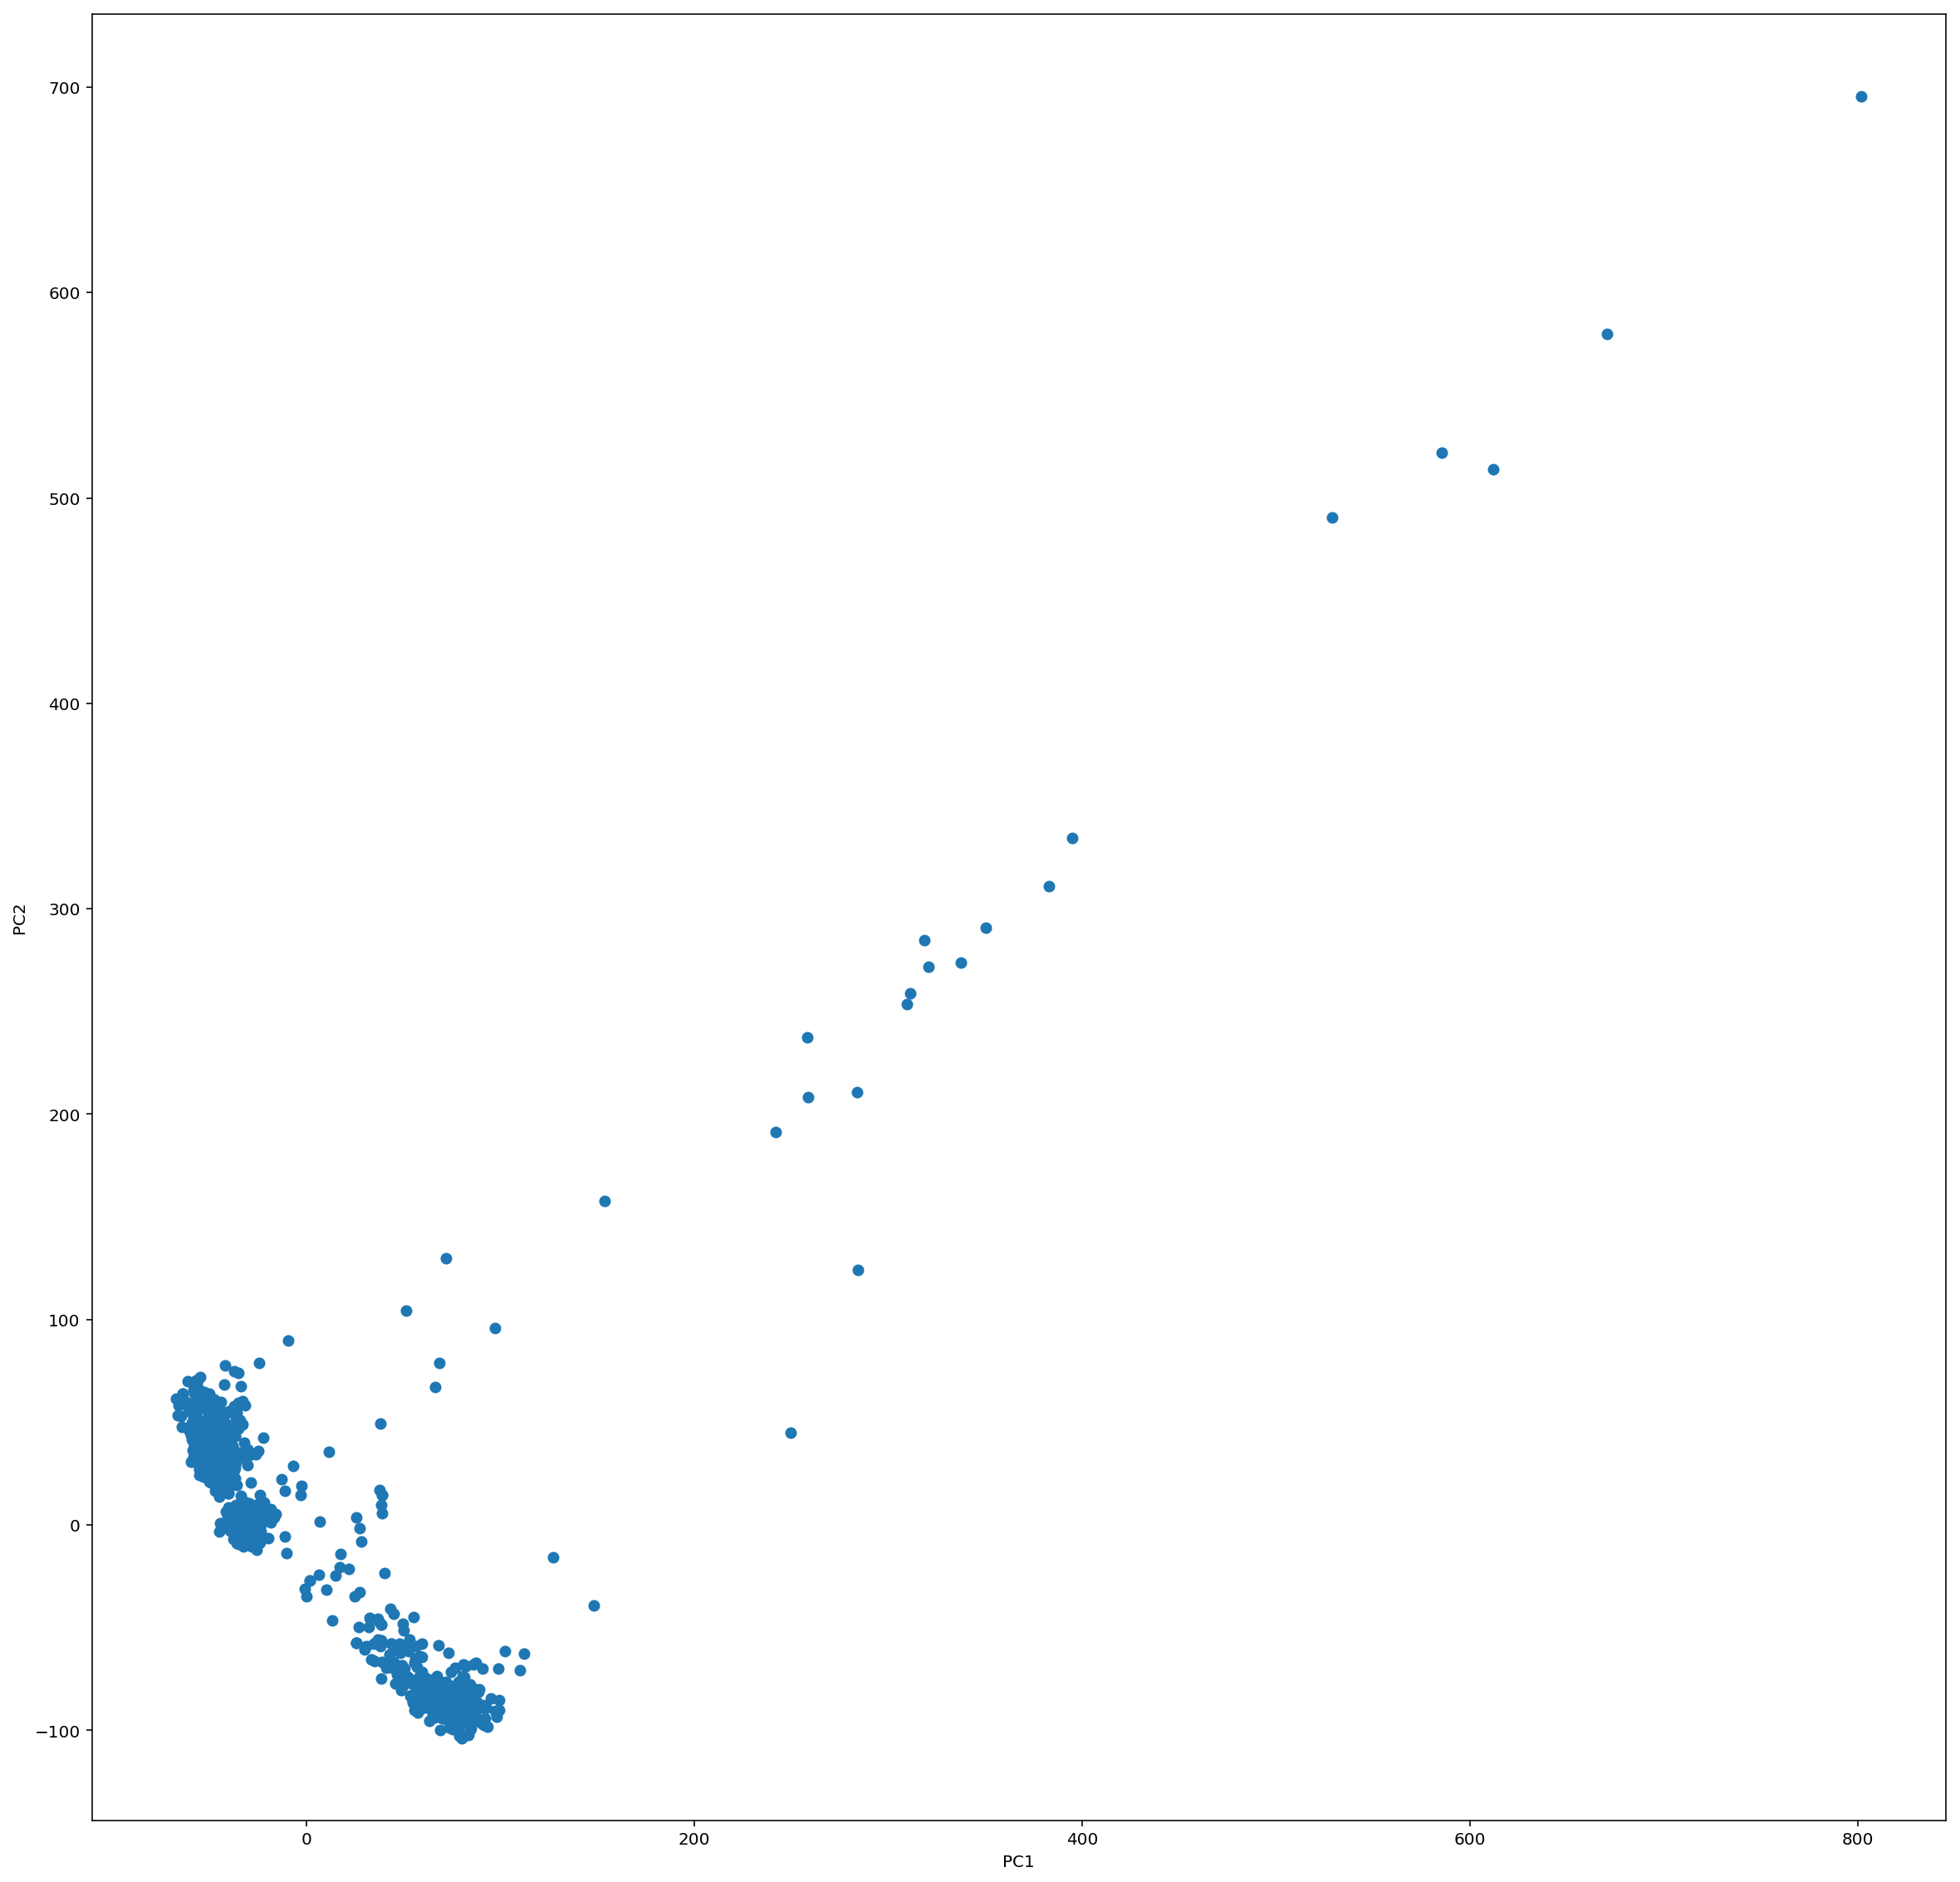

In [203]:
plt.figure(figsize=(20,20))
plt.scatter(pca_pbmc_20_dim[:,0], pca_pbmc_20_dim[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [213]:
from mpl_toolkits.mplot3d import Axes3D

### C: Project onto first 3 PCs, plot scatter plot, note the clusters

In [218]:
#plt.figure(figsize=(20,20))
#plt.scatter(pca_pbmc_20_dim[:,0], pca_pbmc_20_dim[:,1], pca_pbmc_20_dim[:,2], c='r', marker='o')
#plt.xlabel('PC1'
#plt.ylabel('PC2')

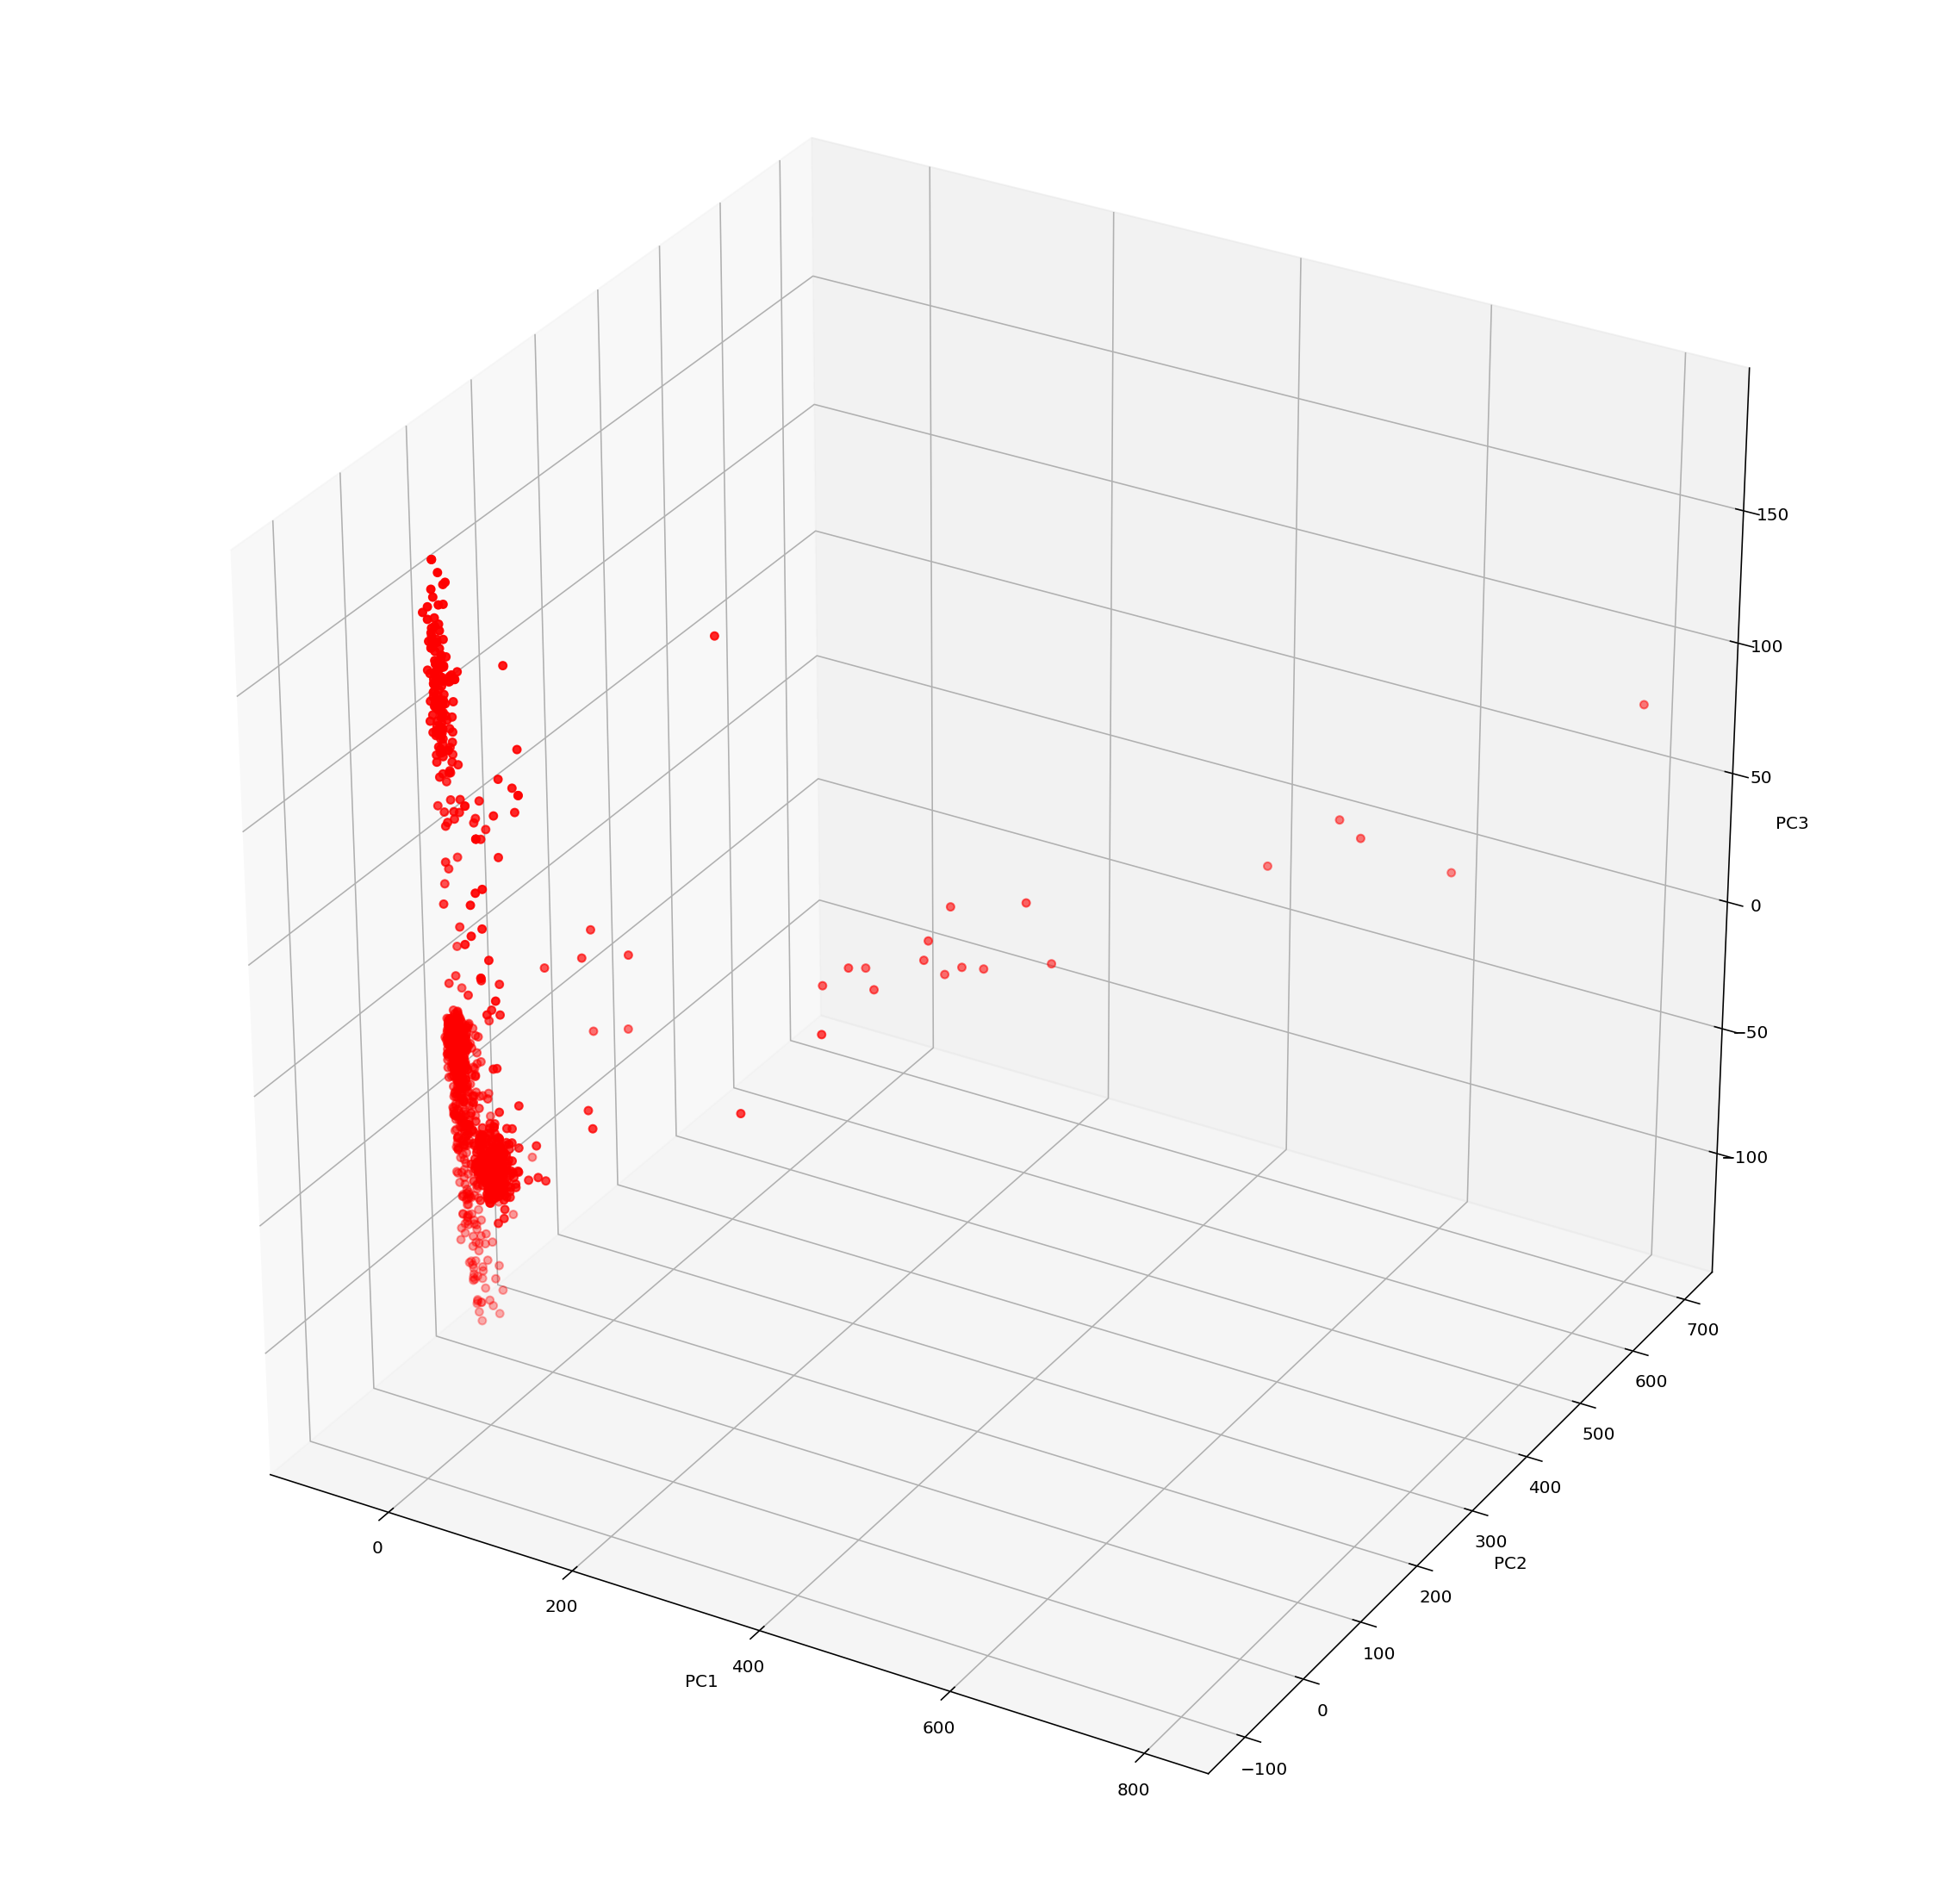

In [217]:
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt

fig = plt.figure(figsize= (20, 20))
ax = fig.add_subplot(111, projection='3d')

x = pca_pbmc_20_dim[:,0]
y = pca_pbmc_20_dim[:,1]
z = pca_pbmc_20_dim[:,2]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PC1 ')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

### D: Heat map or Line plot of first 2 PC next to heatmap of data matrix. Capture the feature?

/Users/niyuli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


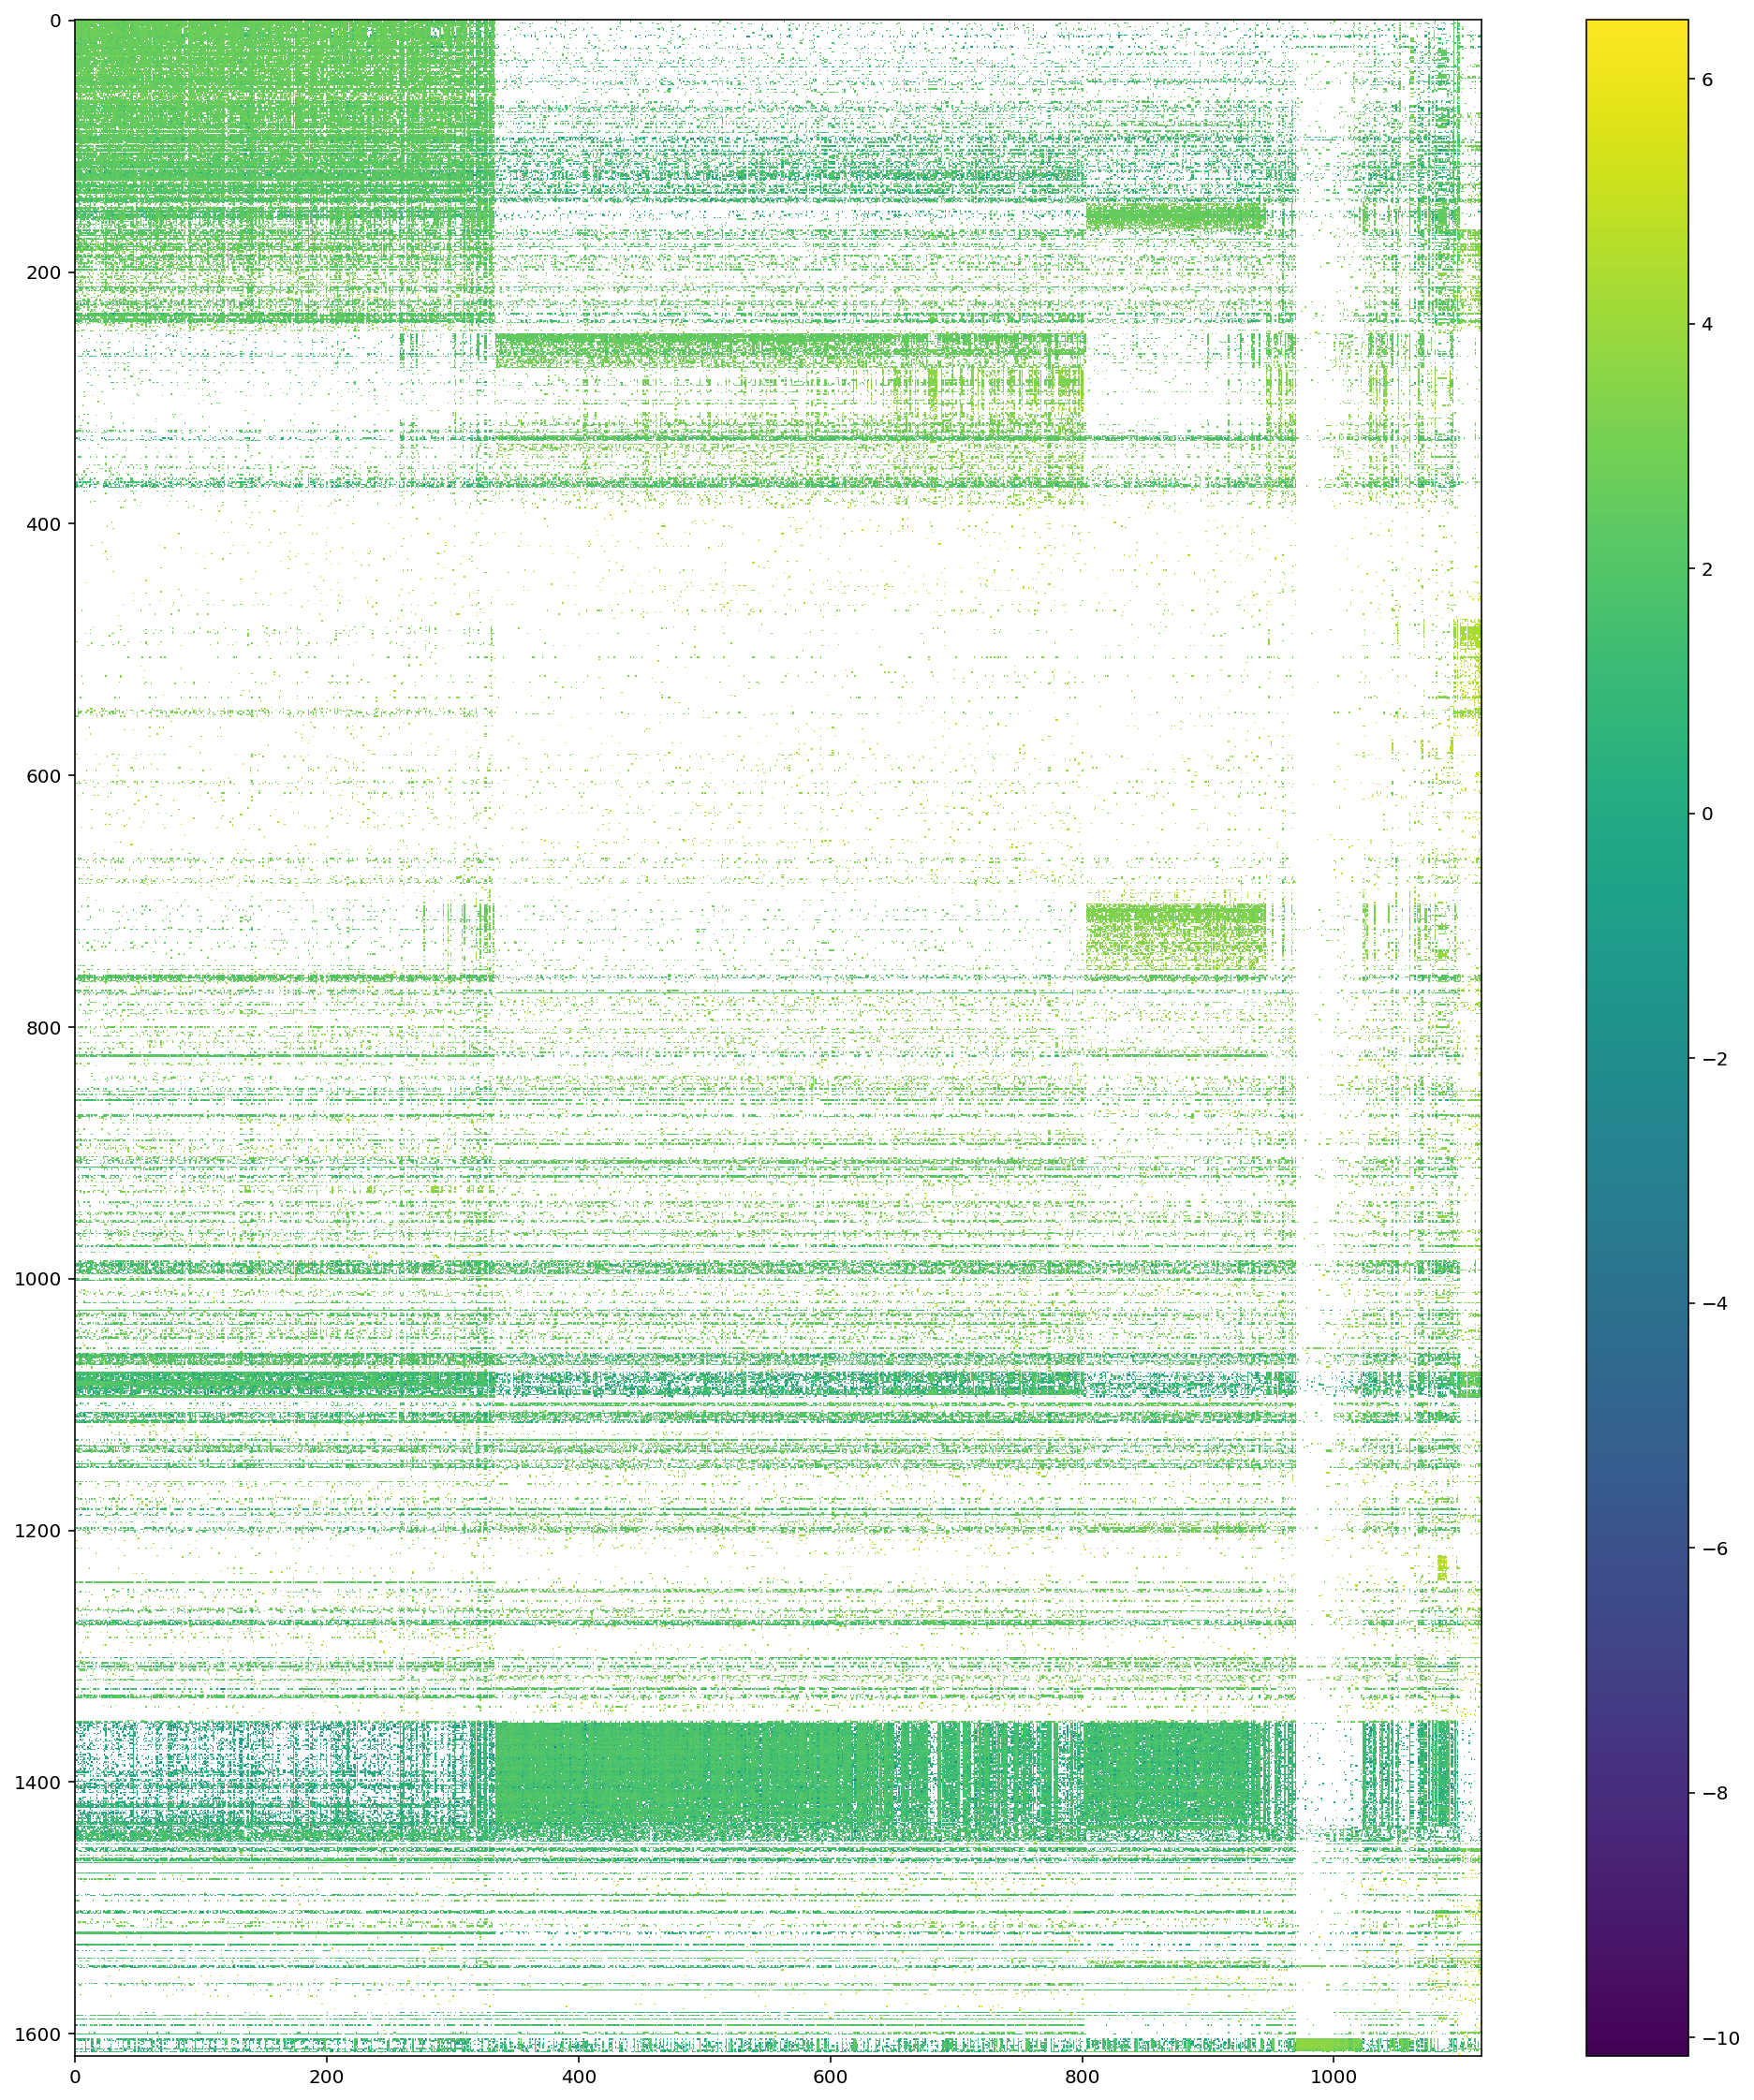

In [222]:
plt.figure(figsize=(20,20))
plt.imshow(np.log(pbmc_arr))
plt.colorbar()

In [224]:
pca.components_.shape # the top 20 PCs

(20, 1618)

In [229]:
PC12_arr = pca.components_.transpose()[:,:2]

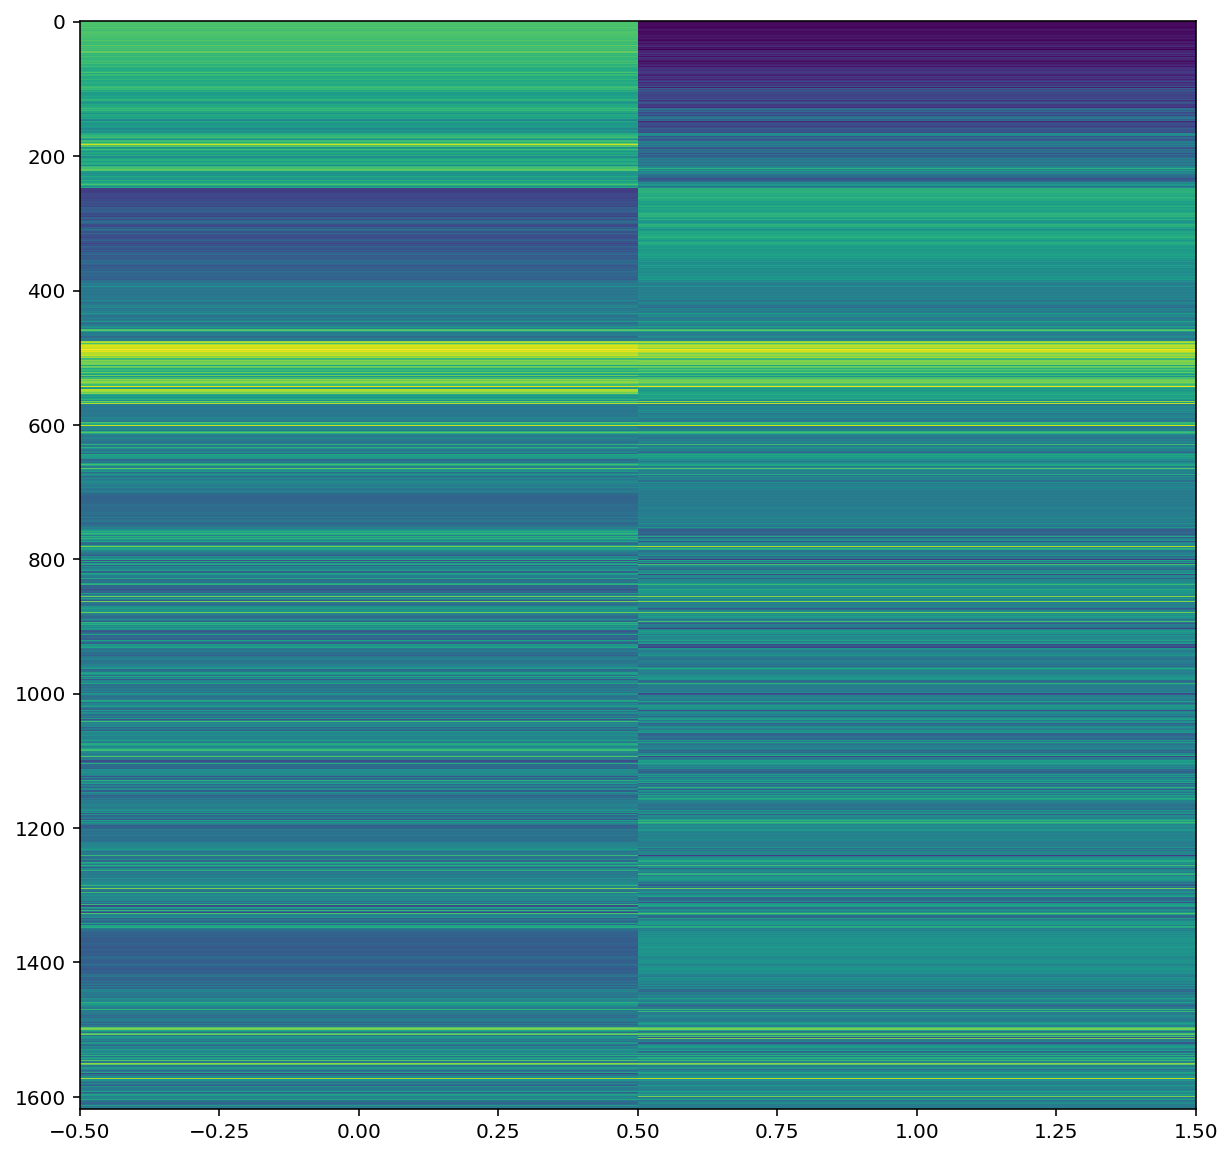

In [254]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(PC12_arr, aspect='auto')
#plt.title('H of K = 3')
#plt.colorbar()

/Users/niyuli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


<Figure size 2160x720 with 0 Axes>

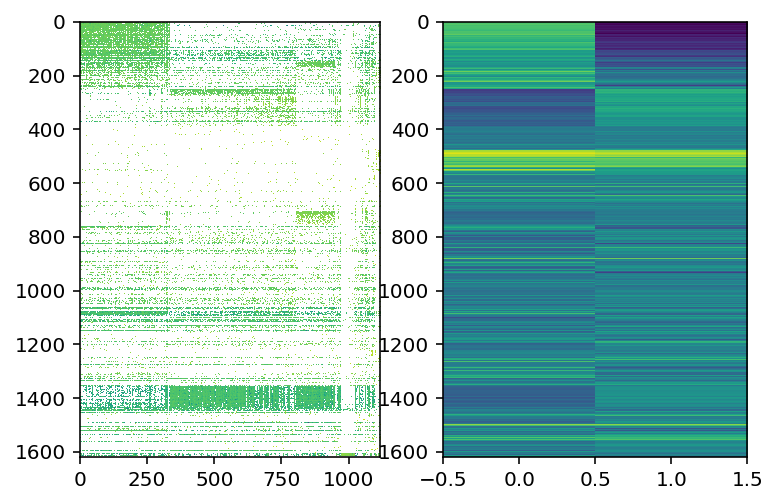

In [263]:
fig = plt.figure(figsize=(30,10))
plt.subplots(sharey=True)
plt.subplot(1, 2, 1)
plt.imshow(np.log(pbmc_arr))

plt.subplot(1, 2, 2)
plt.imshow(PC12_arr, aspect='auto')

plt.show()

#### Note that the PC1 and PC2  captures the expression cell matrix  from cell 0: 750 pretty nicely

In [11]:
# E: Sklearn.decomnposition.NMF to perform k = 4, 20 plot H and W for each k and comment. Subsample to take 1000
# cells if necessary For each k, tell function to try mulitple reps. DOes it capture?

In [283]:
from sklearn.decomposition import NMF

In [284]:
model_NMF_4 = NMF(n_components=4, init='random', random_state=0)

In [285]:
#W (n by k), H (k by m)

In [286]:
pbmc_arr.shape

(1618, 1118)

In [287]:
W_4 = model_NMF_4.fit_transform(pbmc_arr)

In [288]:
H_4 = model_NMF_4.components_

In [289]:
H_4.shape # pc like by gene

(4, 1118)

In [290]:
W_4.shape # cell by pc

(1618, 4)

In [293]:
model_NMF_20 = NMF(n_components=20, init='random', random_state=0)

In [295]:
W_20 = model_NMF_20.fit_transform(pbmc_arr)

In [296]:
H_20 = model_NMF_20.components_

/Users/niyuli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


<Figure size 2160x720 with 0 Axes>

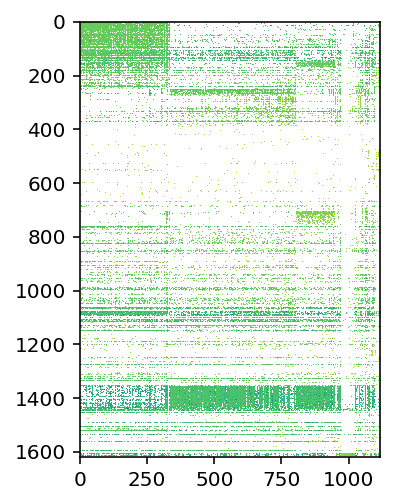

In [292]:
fig = plt.figure(figsize=(30,10))
plt.subplots(sharey=True)
plt.subplot(1, 2, 1)
plt.imshow(np.log(pbmc_arr))

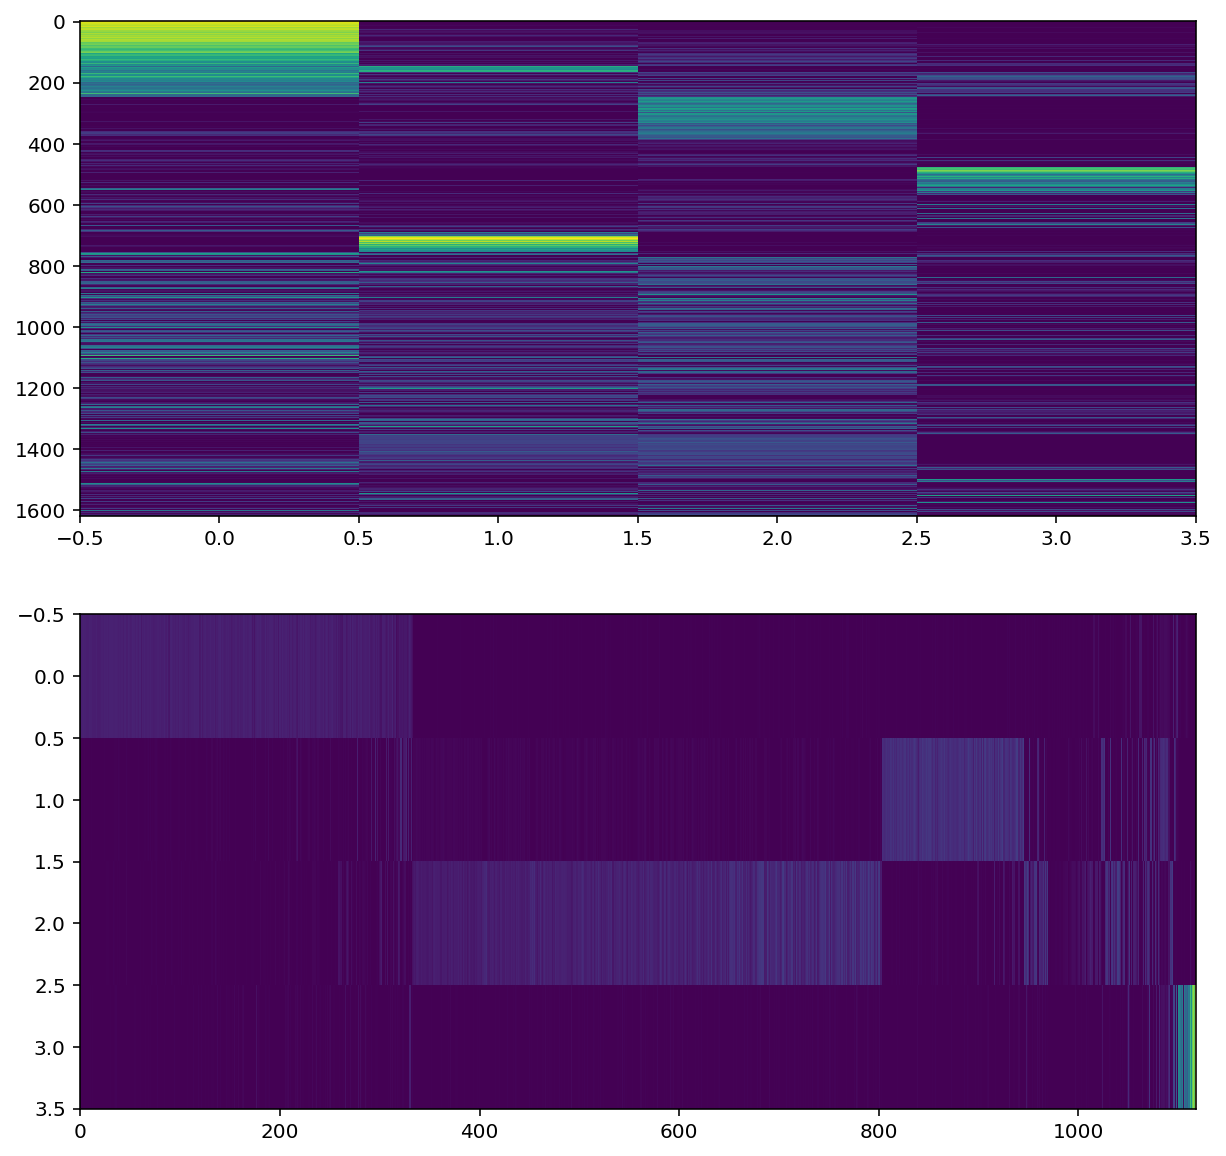

In [291]:
fig = plt.figure(figsize=(10,10))
#plt.subplots(sharey=True)
plt.subplot(2, 1, 1)
plt.imshow(W_4,  aspect='auto')

plt.subplot(2, 1, 2)
plt.imshow(H_4, aspect='auto')

plt.show()

### H_0 captures cell index 0: 250 pretty well, H_2 Capture cell 280: 800 well

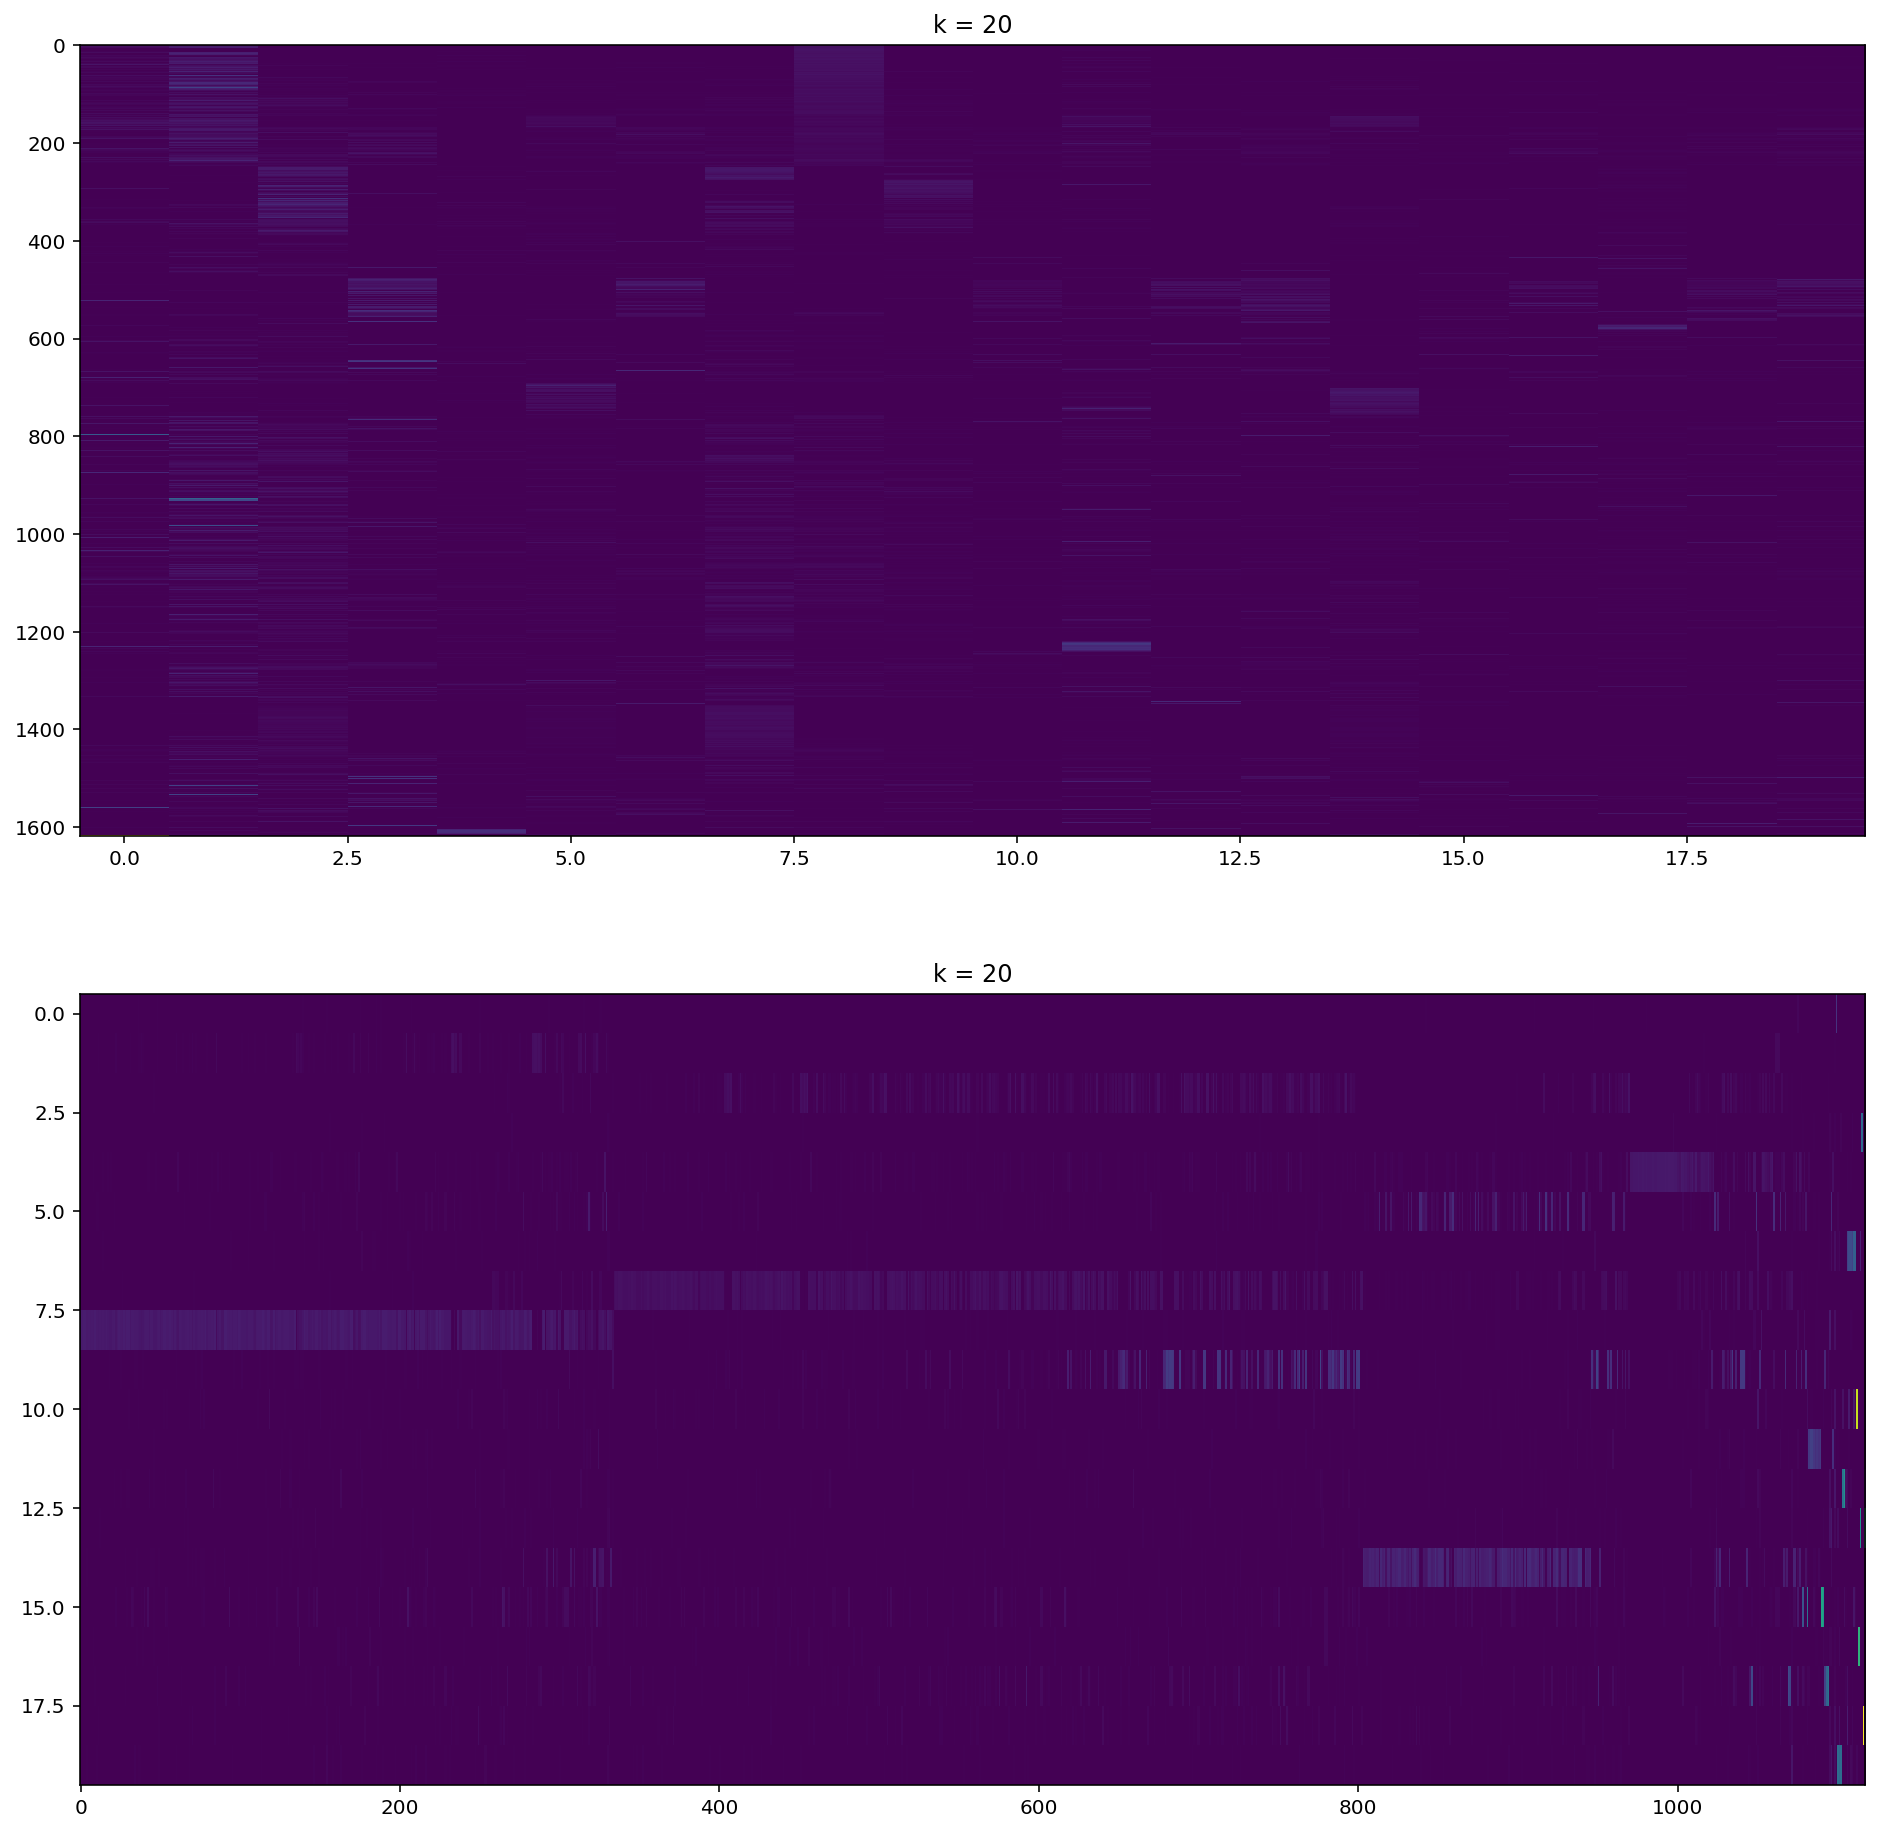

In [299]:
fig = plt.figure(figsize=(16,16))
#plt.subplots(sharey=True)
plt.subplot(2, 1, 1)
plt.imshow(W_20,  aspect='auto')
plt.title('k = 20')
plt.subplot(2, 1, 2)
plt.imshow(H_20, aspect='auto')
plt.title('k = 20')
plt.show()


### H_7 captures cell index 0: 250 pretty well, the other cells are linear combinations of the H and W

#### F: Loow at the W matrix, for one of the W vectors, selectt 5 gene with top coeff value, write down name and function

In [301]:
W_4.shape # gene by 

(1618, 4)

In [302]:
w_vec = W_4[:,0] # first W

In [307]:
w_vec.argsort()[-5:][::-1] # get the top five gene index

array([ 1,  9, 42, 10,  0])

In [309]:
ls

HW6_problem1.ipynb     PBMC_6_Gene_Names.csv  pbmc_data_matt.csv


In [323]:
gene_df = pd.read_csv('PBMC_6_Gene_Names.csv', names = ['gene'])

In [324]:
gene_df.shape

(1618, 1)

In [326]:
gene_df.iloc[w_vec.argsort()[-5:][::-1]]

gene
1    ISG15
9    SMIM1
42  POU3F1
10   NPHP4
0     HES4

ISG15: 
The protein encoded by this gene is a ubiquitin-like protein that is conjugated to intracellular target proteins upon activation by interferon-alpha and interferon-beta. Several functions have been ascribed to the encoded protein, including chemotactic activity towards neutrophils, direction of ligated target proteins to intermediate filaments, cell-to-cell signaling, and antiviral activity during viral infections. 

SMIM1 Gene 
This gene encodes a small, conserved protein that participates in red blood cell formation. The encoded protein is localized to the cell membrane and is the antigen for the Vel blood group. 

POU3F1 Gene
POU3F1 (POU Class 3 Homeobox 1) is a Protein Coding gene, and is affiliated with the lncRNA class. Diseases associated with POU3F1 include Neurogenic Bowel. Gene Ontology (GO) annotations related to this gene include DNA-binding transcription factor activity.

HES4 (Hes Family BHLH Transcription Factor 4) is a Protein Coding gene. Among its related pathways are PI3K-Akt signaling pathway. Gene Ontology (GO) annotations related to this gene include transcription factor binding and protein dimerization activity.

NPHP4 Gene 
This gene encodes a protein involved in renal tubular development and function. This protein interacts with nephrocystin, and belongs to a multifunctional complex that is localized to actin- and microtubule-based structures. 

### G: Perform NNMF for K = 1 to 40 plot the reconstruction error as a function of k.

In [336]:
def NNMF_residual_error(D,k):
    
    '''
    function that out put frobius distance of D - W*H
    where W and H are learned from NNMF
    '''
    
    model_NMF_ = NMF(n_components= k, init='random', random_state=0)
    W_ = model_NMF_.fit_transform(D)
    H_ = model_NMF_.components_
    
    resid_err_arr = D - np.dot(W_, H_)
    resid_err_arr_sq = np.square(resid_err_arr)
    
    return (np.sum(resid_err_arr_sq))**0.5

In [337]:
NNMF_residual_error(D = pbmc_arr, k = 1)

11230.946467347281

In [338]:
NNMF_residual_error(D = pbmc_arr, k = 2)

10955.150724052673

In [339]:
NNMF_residual_error(D = pbmc_arr, k = 3)

10690.664150002072

In [340]:
nnmf_residual_err_arr = []

for dummy_i in range(1,41):
    print(dummy_i, ' is being processed')
    nnmf_residual_err_arr.append(NNMF_residual_error(D = pbmc_arr, k = dummy_i))

1  is being processed
2  is being processed
3  is being processed
4  is being processed
5  is being processed
6  is being processed
7  is being processed
8  is being processed
9  is being processed
10  is being processed
11  is being processed
12  is being processed
13  is being processed
14  is being processed
15  is being processed
16  is being processed
17  is being processed
18  is being processed
19  is being processed
20  is being processed
21  is being processed
22  is being processed
23  is being processed
24  is being processed
25  is being processed
26  is being processed
27  is being processed
28  is being processed
29  is being processed
30  is being processed
31  is being processed
32  is being processed
33  is being processed
34  is being processed
35  is being processed
36  is being processed
37  is being processed
38  is being processed
39  is being processed
40  is being processed


Text(0.5,0,'k')

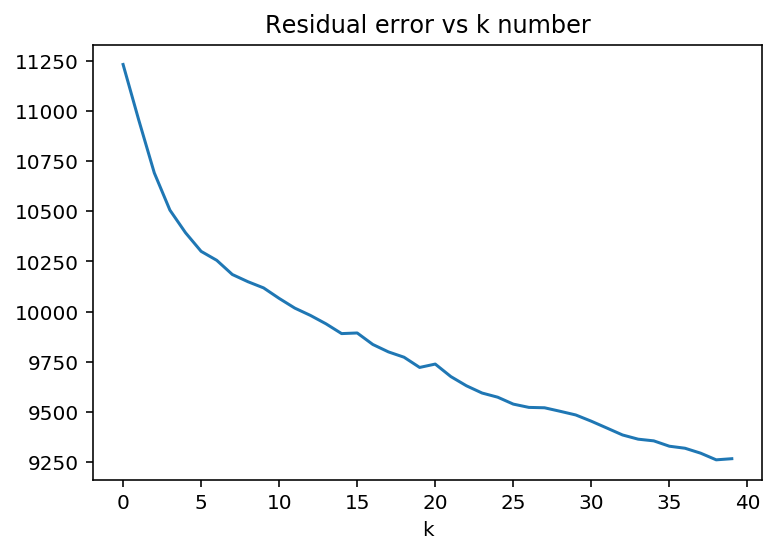

In [342]:
plt.figure()
plt.plot(nnmf_residual_err_arr)
plt.title('Residual error vs k number')
plt.xlabel('k')

In [17]:
# H: Look up sklearn.decomposition.SparsePCA. What does mean in the function call?

It is the coefficient of the L1 penalty imposed on the Vk matrix. When alpha is large, it 
forces the entries of the Vk matrix to be sparce and small, making the model easier to generalize